## Plotting different kinematic variables at reco level for different $\kappa_\lambda$ for the new events added by the new cuts

First we will import all of the necessary packages and load the data

In [1]:
# load a coffea file
from coffea.util import load
import os
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import hist, processor
#from pocket_coffea.parameters import defaults

from hist import Hist
import vector
vector.register_awkward()

import sys
#set the resolution of the figures
matplotlib.rcParams["figure.dpi"] = 300

/work/mmalucch/micromamba/envs/pocket-coffea/lib/python3.9/site-packages/coffea/util.py:154: FutureWarning: In coffea version v2023.3.0 (target date: 31 Mar 2023), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [2]:
#load data
prefix =  str(
    os.environ.get("HH", "/pnfs/psi.ch/cms/trivcat/store/user/mmalucch/out_HH4b/")
)
prefix='/work/mmalucch//out_hh4b/'

input_nc = prefix + "out_privateValidation_newJetCuts/output_all.coffea"
input_oc= prefix + "out_spanet/output_all.coffea"
input_nc_kl=  "/work/mmalucch/out_hh4b/out_spanet_newkl_newJetCuts/output_all.coffea"
#dataset with new cuts without kl=3.5
o = load(f"{input_nc}")
#dataset with old cuts
oc= load(f"{input_oc}")
#dataset with new cuts with kl=3.5
okl=load(f"{input_nc_kl}")

## Separating events with new and old cuts

The idea is to get the events that are included by the new cuts, which are more inclusive, and see if how the distributions change in these events.

In [3]:
def filter_dataset_2(datasets, key, key2):
    for dataset in datasets:
        if key in dataset and key2 in dataset:
            return dataset
    print("No dataset contains both keys.")
    return ""


def kl_var(o,k_l,p,var):
    dataset=filter_dataset_2(o["columns"]["GluGlutoHHto4B_spanet"].keys(), k_l,p)
    #set var=0 to choose "4b region"
    category=list(o["columns"]["GluGlutoHHto4B_spanet"][dataset].keys())[var]
    col=o["columns"]["GluGlutoHHto4B_spanet"][dataset][category]
    return col

In [4]:
kl_1_new_cuts=kl_var(okl,"kl-1p00","postEE",0)
kl_0_new_cuts=kl_var(okl,"kl-0p00","postEE",0)
kl_2p45_new_cuts=kl_var(okl,"kl-2p45","postEE",0)
kl_5_new_cuts=kl_var(okl,"kl-5p00","postEE",0)

kl_1_old_cuts=kl_var(oc,"kl-1p00","postEE",0)
kl_0_old_cuts=kl_var(oc,"kl-0p00","postEE",0)
kl_2p45_old_cuts=kl_var(oc,"kl-2p45","postEE",0)
kl_5_old_cuts=kl_var(oc,"kl-5p00","postEE",0)

In [5]:
# kl_1_new_cuts=okl["columns"]["GluGlutoHHto4B_spanet"]["GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_spanet__2022_postEE"]["4b_region"]
# kl_1_old_cuts=oc["columns"]["GluGlutoHHto4B_spanet"]["GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022_postEE"]["4b_region"]

In [6]:
kl_datasets=[kl_1_new_cuts,kl_0_new_cuts,kl_2p45_new_cuts,kl_5_new_cuts,kl_1_old_cuts,kl_0_old_cuts,kl_2p45_old_cuts,kl_5_old_cuts]
print(type(kl_datasets[0]["weight"]))

for dataset in kl_datasets:
    #print("Dataset type:", (dataset))
    for key in dataset.keys():
        # Check if the item is an instance of column_accumulator
        if hasattr(dataset[key], 'value'):
            #print(f"Converting {key} from column_accumulator to np.array")
            dataset[key] = dataset[key].value
        else:
            print(f"{key} is already a np.array or another type: {type(dataset[key])}")

print(type(kl_datasets[0]["weight"]))


<class 'coffea.processor.accumulator.column_accumulator'>
<class 'numpy.ndarray'>


In [7]:
kl_1_new_cuts.keys()
kl_1_old_cuts.keys()


dict_keys(['weight', 'JetGoodHiggsMatched_N', 'JetGoodHiggsMatched_provenance', 'JetGoodHiggsMatched_pt', 'JetGoodHiggsMatched_eta', 'JetGoodHiggsMatched_phi', 'JetGoodHiggsMatched_mass', 'JetGoodHiggsMatched_btagPNetB', 'JetGoodHiggsMatched_ptPnetRegNeutrino', 'JetGoodHiggsMatched_hadronFlavour', 'JetGoodMatched_N', 'JetGoodMatched_provenance', 'JetGoodMatched_pt', 'JetGoodMatched_eta', 'JetGoodMatched_phi', 'JetGoodMatched_mass', 'JetGoodMatched_btagPNetB', 'JetGoodMatched_ptPnetRegNeutrino', 'JetGoodMatched_hadronFlavour', 'JetGoodHiggs_N', 'JetGoodHiggs_pt', 'JetGoodHiggs_eta', 'JetGoodHiggs_phi', 'JetGoodHiggs_mass', 'JetGoodHiggs_btagPNetB', 'JetGoodHiggs_ptPnetRegNeutrino', 'JetGoodHiggs_hadronFlavour', 'JetGood_N', 'JetGood_pt', 'JetGood_eta', 'JetGood_phi', 'JetGood_mass', 'JetGood_btagPNetB', 'JetGood_ptPnetRegNeutrino', 'JetGood_hadronFlavour'])

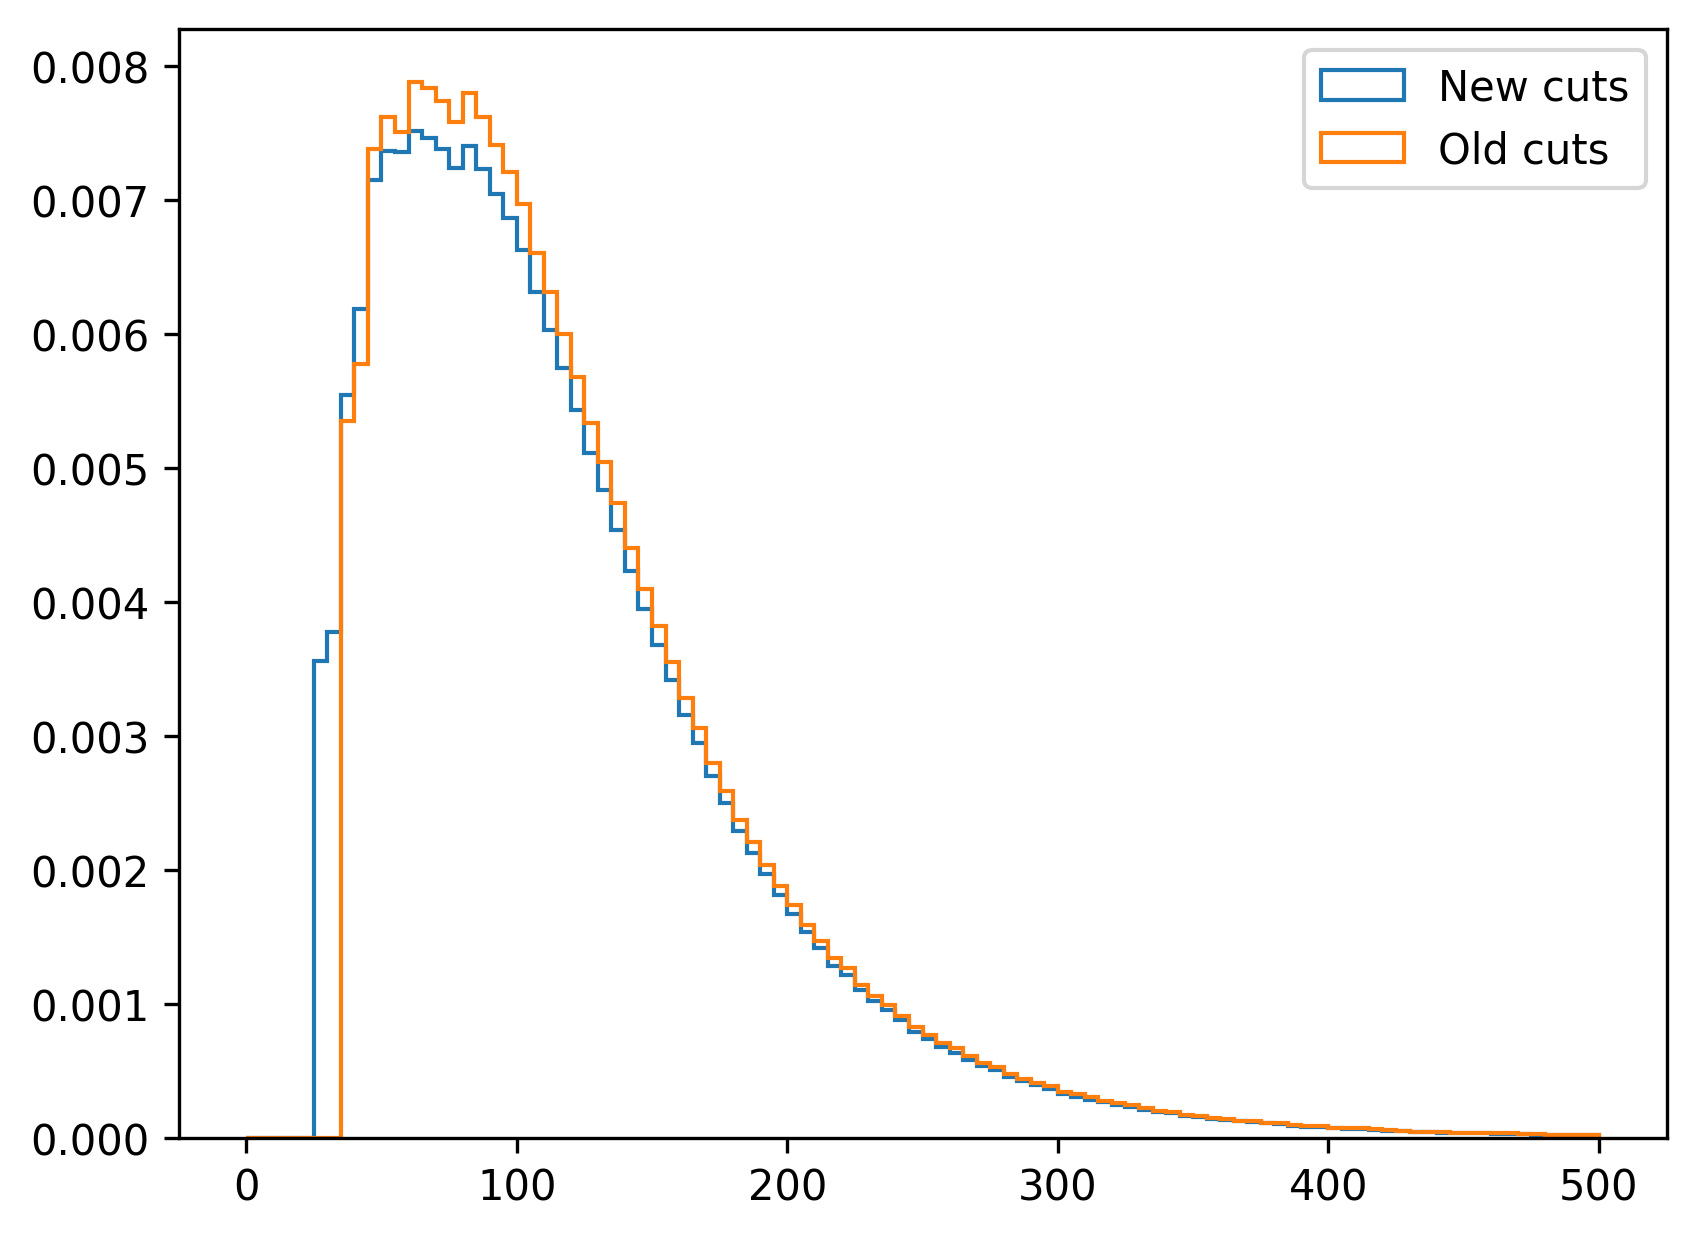

In [8]:
# print(len(kl_1_old_cuts["JetGoodHiggsMatched_pt"]))
# pt_unflat=ak.unflatten(kl_1_old_cuts["JetGoodHiggsMatched_pt"],kl_1_old_cuts["JetGoodHiggsMatched_N"])
# pt_unflat=ak.unflatten(kl_1_old_cuts["JetGoodHiggsMatched_pt"],kl_1_old_cuts["JetGoodHiggsMatched_N"])
# print(len(pt_unflat))

plt.hist(kl_1_new_cuts["JetGoodHiggsMatched_ptPnetRegNeutrino"],bins=100,range=(0,500),histtype='step',label="New cuts", density=True)
plt.hist(kl_1_old_cuts["JetGoodHiggsMatched_ptPnetRegNeutrino"],bins=100,range=(0,500),histtype='step',label="Old cuts", density=True)
plt.legend()
plt.show()

We can see that the new cuts include the events for which the $p_T=25$ GeV

In [9]:
# pt_unflat_oc=ak.unflatten(kl_1_old_cuts["JetGoodHiggs_pt"],kl_1_old_cuts["JetGoodHiggs_N"])
# pt_unflat_nc=ak.unflatten(kl_1_new_cuts["JetGoodHiggs_pt"],kl_1_new_cuts["JetGoodHiggs_N"])

# mask_pt_35= ak.any((pt_unflat_nc<35),axis=1)
# mask_pt_0= ak.any((0<pt_unflat_nc),axis=1)

# print(pt_unflat_nc)
# print(len(pt_unflat_nc))
# print(pt_unflat_nc[mask_pt_35 & mask_pt_0][:2])
# print(len(pt_unflat_nc[mask_pt_35 & mask_pt_0]))


## Plotting the kinematic variables for different $\kappa_\lambda$ datasets

In [10]:
#four vector added by the new cuts
def jet_four_vector(kl_dataset):
    #jet_prov_unflat=ak.unflatten(kl_dataset["JetGoodHiggs_provenance"],kl_dataset["JetGoodHiggs_N"] )
    jet_pt_unflat=ak.unflatten(kl_dataset["JetGoodHiggs_ptPnetRegNeutrino"],kl_dataset["JetGoodHiggs_N"])
    jet_eta_unflat=ak.unflatten( kl_dataset["JetGoodHiggs_eta"],kl_dataset["JetGoodHiggs_N"])
    jet_phi_unflat=ak.unflatten(kl_dataset["JetGoodHiggs_phi"] ,kl_dataset["JetGoodHiggs_N"])
    jet_mass_unflat=ak.unflatten(kl_dataset["JetGoodHiggs_mass"],kl_dataset["JetGoodHiggs_N"])
    jet_btag_unflat=ak.unflatten(kl_dataset["JetGoodHiggs_btagPNetB"],kl_dataset["JetGoodHiggs_N"])

    jet = ak.zip(
        {
            "pt": jet_pt_unflat,
            "eta": jet_eta_unflat, 
            "phi": jet_phi_unflat, 
            "mass": jet_mass_unflat,  
            "btag": jet_btag_unflat,  
            #"prov": jet_prov_unflat
        }, with_name="Momentum4D"
    )

    return jet


In [11]:
jet_kl1_nc=jet_four_vector(kl_1_new_cuts)
jet_kl0_nc=jet_four_vector(kl_0_new_cuts)
jet_kl2p45_nc=jet_four_vector(kl_2p45_new_cuts)
jet_kl5_nc=jet_four_vector(kl_0_new_cuts)

jet_kl1_oc=jet_four_vector(kl_1_old_cuts)
jet_kl0_oc=jet_four_vector(kl_0_old_cuts)
jet_kl2p45_oc=jet_four_vector(kl_2p45_old_cuts)
jet_kl5_oc=jet_four_vector(kl_5_old_cuts)

print(jet_kl1_nc.pt[:10])
print(ak.any(jet_kl1_nc.pt<35,axis=1))
mask=ak.any((jet_kl1_nc.pt<35) & (0<jet_kl1_nc.p),axis=1)
print(jet_kl1_nc.pt[mask])

[[101, 108, 89.9, 68.5], [282, 160, 231, ... 95.3, 43, 96.2], [95.6, 143, 51.9, 117]]
[False, False, False, False, False, False, ... False, False, False, False, False]
[[137, 34.9, 122, 153], [29.5, 95.3, 43, ... 198, 176, 25.1], [226, 54.3, 31.2, 150]]


Now we want the events added buy the new cuts, meaning those for which the pt of the jets is between 25-35 GeV. For that we will take the MC with the new cuts and apply a mask for which we only keep events where there is at leadt one jet with pt <35 GeV

In [12]:
def jet_four_vector_35mask(kl_dataset):
    #jet_prov_unflat=ak.unflatten(kl_dataset["JetGoodHiggs_provenance"],kl_dataset["JetGoodHiggs_N"] )
    jet_pt_unflat=ak.unflatten(kl_dataset["JetGoodHiggs_ptPnetRegNeutrino"],kl_dataset["JetGoodHiggs_N"])
    jet_eta_unflat=ak.unflatten( kl_dataset["JetGoodHiggs_eta"],kl_dataset["JetGoodHiggs_N"])
    jet_phi_unflat=ak.unflatten(kl_dataset["JetGoodHiggs_phi"] ,kl_dataset["JetGoodHiggs_N"])
    jet_mass_unflat=ak.unflatten(kl_dataset["JetGoodHiggs_mass"],kl_dataset["JetGoodHiggs_N"])
    jet_btag_unflat=ak.unflatten(kl_dataset["JetGoodHiggs_btagPNetB"],kl_dataset["JetGoodHiggs_N"])

    mask_pt_35= ak.any((jet_pt_unflat<35),axis=1)
    mask_pt_0= ak.any((0<jet_pt_unflat),axis=1)

    jet = ak.zip(
        {
            "pt": jet_pt_unflat[mask_pt_35 & mask_pt_0],
            "eta": jet_eta_unflat[mask_pt_35 & mask_pt_0],  # Assume you have jet_eta_unflat similarly defined
            "phi": jet_phi_unflat[mask_pt_35 & mask_pt_0],  # Assume you have jet_phi_unflat similarly defined
            "mass": jet_mass_unflat[mask_pt_35 & mask_pt_0],  # Assume you have jet_mass_unflat similarly defined
            "btag": jet_btag_unflat[mask_pt_35 & mask_pt_0],  # Assume you have jet_btag_unflat similarly defined
            #"prov": jet_prov_unflat
        }, with_name="Momentum4D"
    )

    return jet


In [13]:
def jet_four_vector_good_35mask(kl_dataset):
    jet_prov_unflat=ak.unflatten(kl_dataset["JetGoodMatched_provenance"],kl_dataset["JetGoodMatched_N"] )
    jet_pt_unflat=ak.unflatten(kl_dataset["JetGoodMatched_ptPnetRegNeutrino"],kl_dataset["JetGoodMatched_N"])
    jet_eta_unflat=ak.unflatten( kl_dataset["JetGoodMatched_eta"],kl_dataset["JetGoodMatched_N"])
    jet_phi_unflat=ak.unflatten(kl_dataset["JetGoodMatched_phi"] ,kl_dataset["JetGoodMatched_N"])
    jet_mass_unflat=ak.unflatten(kl_dataset["JetGoodMatched_mass"],kl_dataset["JetGoodMatched_N"])
    jet_btag_unflat=ak.unflatten(kl_dataset["JetGoodMatched_btagPNetB"],kl_dataset["JetGoodMatched_N"])

    # mask_pt_35= ak.any((jet_pt_unflat<35),axis=1)
    # mask_pt_0= ak.all((0<jet_pt_unflat),axis=1)

    mask=ak.any((jet_pt_unflat<35) & (0<jet_pt_unflat),axis=1)

    jet = ak.zip(
        {
            "pt": jet_pt_unflat[mask],
            "eta": jet_eta_unflat[mask],  # Assume you have jet_eta_unflat similarly defined
            "phi": jet_phi_unflat[mask],  # Assume you have jet_phi_unflat similarly defined
            "mass": jet_mass_unflat[mask],  # Assume you have jet_mass_unflat similarly defined
            "btag": jet_btag_unflat[mask],  # Assume you have jet_btag_unflat similarly defined
            "prov": jet_prov_unflat[mask]
        }, with_name="Momentum4D"
    )

    return jet


In [14]:
jet_kl1_nc_mask_matched=jet_four_vector_good_35mask(kl_1_new_cuts)
jet_kl0_nc_mask_matched=jet_four_vector_good_35mask(kl_0_new_cuts)
jet_kl2p45_nc_mask_matched=jet_four_vector_good_35mask(kl_2p45_new_cuts)
jet_kl5_nc_mask_matched=jet_four_vector_good_35mask(kl_0_new_cuts)

jet_kl1_oc_mask_matched=jet_four_vector_good_35mask(kl_1_old_cuts)
jet_kl0_oc_mask_matched=jet_four_vector_good_35mask(kl_0_old_cuts)
jet_kl2p45_oc_mask_matched=jet_four_vector_good_35mask(kl_2p45_old_cuts)
jet_kl5_oc_mask_matched=jet_four_vector_good_35mask(kl_5_old_cuts)

print(jet_kl1_nc_mask_matched.prov)


[[1, 1, 2, 2, -999, -999], [2, 1, 2, ... -999, -999], [1, 2, 1, 2, -999, -999, -999]]


In [15]:
jet_kl1_nc_maks=jet_four_vector_35mask(kl_1_new_cuts)
jet_kl0_nc_mask=jet_four_vector_35mask(kl_0_new_cuts)
jet_kl2p45_nc_mask=jet_four_vector_35mask(kl_2p45_new_cuts)
jet_kl5_nc_mask=jet_four_vector_35mask(kl_0_new_cuts)

jet_kl1_oc_mask=jet_four_vector_35mask(kl_1_old_cuts)
jet_kl0_oc_mask=jet_four_vector_35mask(kl_0_old_cuts)
jet_kl2p45_oc_mask=jet_four_vector_35mask(kl_2p45_old_cuts)
jet_kl5_oc_mask=jet_four_vector_35mask(kl_5_old_cuts)


In [16]:
# new_cuts_jet_kl1=jet_four_vector(kl_1_new_cuts)
# kl_1_new_cuts["JetGoodHiggs_mass"]

# mask_pt_35= ak.any((pt_unflat_nc<35),axis=1)
# mask_pt_0= ak.any((0<pt_unflat_nc),axis=1)

# new_events_kl1=new_cuts_jet_kl1[mask_pt_35 & mask_pt_0]

# print(len(new_cuts_jet_kl1))
# print(len(new_events_kl1))

# print (len(new_events_kl1)/len(new_cuts_jet_kl1))

[0.999, 0.999, 0.985, 0.713, -999, -999, ... 0.998, 0.998, 0.818, -999, -999, -999]


PermissionError: [Errno 13] Permission denied: '/t3home/ramella/HH4b_SPANet/new_event_plots_out/reco_btag_kl1.png'

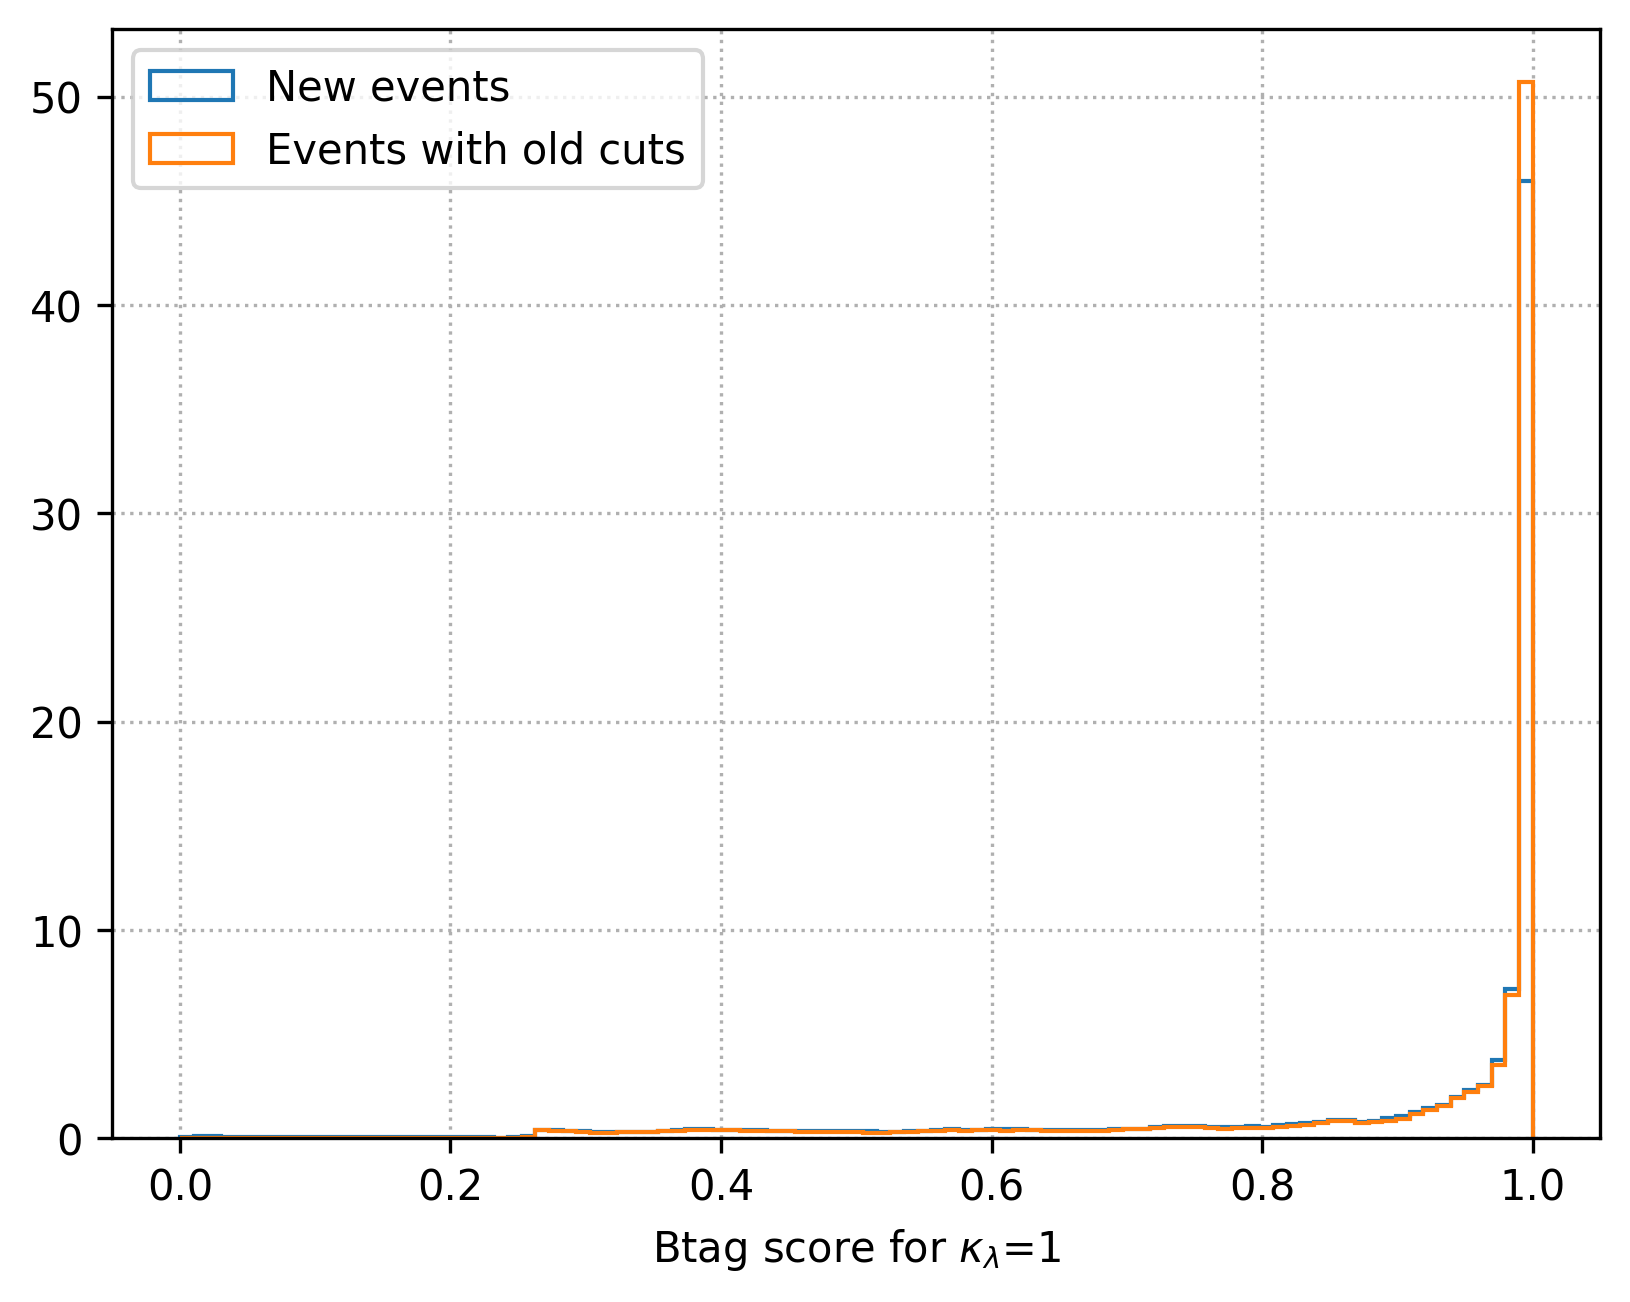

In [17]:
# mask_pt_35= ak.any((jet_kl1_nc.pt<35),axis=1)
# mask_pt_0= ak.any((0<jet_kl1_nc.pt),axis=1)
# masked_events=kl_1_new_cuts["JetGoodHiggs_N"][mask_pt_35 & mask_pt_0]
# print(jet_kl1_nc_maks.pt)
# print(masked_events)

# flat_masked_pt=ak.flatten(jet_kl1_nc_maks.pt)

def plot_kinvar(new_ev, kl_full_dataset, kinvar,kl,bins,higgs):
    # print(getattr(new_ev, kinvar))
    # print(getattr(kl_full_dataset, kinvar))
    if "leading" in higgs or "subleading" in higgs or "dihiggs" in higgs:
        flat_ne=(getattr(new_ev, kinvar))
        flat_full=(getattr(kl_full_dataset, kinvar))
    else:
        flat_ne=ak.flatten(getattr(new_ev, kinvar))
        flat_full=ak.flatten(getattr(kl_full_dataset, kinvar))

    print(flat_ne)

    # print(flat_ne)
    plt.hist(flat_ne,bins, histtype="step",density=True,label="New events")
    plt.hist(flat_full, bins,histtype="step",density=True,label="Events with old cuts")
    if "leading" in higgs or "subleading" in higgs or "dihiggs" in higgs:
        if kinvar=="pt":
            pt_label=r"$p_T$ of the "+ higgs+ " Higgs for $\kappa_\lambda$=" + kl
            plt.xlabel(pt_label)
        elif kinvar=="btag":
            btag_label=r"Btag score of the " + higgs + " Higgs for $\kappa_\lambda$=" + kl
            plt.xlabel(btag_label)
        elif kinvar=="eta":
            eta_label=r"$\eta$ of the " + higgs + " Higgs for $\kappa_\lambda$=" + kl
            plt.xlabel(eta_label)
        elif kinvar=="btag":
            phi_label=r"$\phi$ of the " + higgs + " Higgs for $\kappa_\lambda$=" + kl
            plt.xlabel(phi_label)
        elif kinvar=="mass":
            phi_label=r"Mass of the " + higgs + " Higgs for $\kappa_\lambda$=" + kl
            plt.xlabel(phi_label)
    else:
        if kinvar=="pt":
            pt_label=r"$p_T$ for $\kappa_\lambda$=" + kl
            plt.xlabel(pt_label)
        elif kinvar=="btag":
            btag_label=r"Btag score for $\kappa_\lambda$=" + kl
            plt.xlabel(btag_label)
        elif kinvar=="eta":
            eta_label=r"$\eta$ for $\kappa_\lambda$=" + kl
            plt.xlabel(eta_label)
        elif kinvar=="btag":
            phi_label=r"$\phi$ for $\kappa_\lambda$=" + kl
            plt.xlabel(phi_label)
    plt.grid(linestyle=":")
    plt.legend()

    save_path=f"/t3home/ramella/HH4b_SPANet/new_event_plots_out/reco{higgs}_{kinvar}_kl{kl}.png"
    plt.savefig(save_path)

    plt.show()


plot_kinvar(jet_kl1_nc_mask_matched,jet_kl1_oc,"btag","1",np.linspace(0,1,100),"")
plot_kinvar(jet_kl1_nc_mask_matched,jet_kl1_oc,"pt","1",np.linspace(0,500,100),"")
plot_kinvar(jet_kl0_nc_mask_matched,jet_kl0_oc,"pt","0",np.linspace(0,500,100),"")
plot_kinvar(jet_kl0_nc_mask_matched,jet_kl0_oc,"btag","0",np.linspace(0,1,100),"")
plot_kinvar(jet_kl2p45_nc_mask_matched,jet_kl2p45_oc,"pt","2.45",np.linspace(0,500,100),"")
plot_kinvar(jet_kl2p45_nc_mask_matched,jet_kl2p45_oc,"btag","2.45",np.linspace(0,1,100),"")
plot_kinvar(jet_kl5_nc_mask_matched,jet_kl5_oc,"pt","5",np.linspace(0,500,100),"")
plot_kinvar(jet_kl5_nc_mask_matched,jet_kl5_oc,"btag","5",np.linspace(0,1,100),"")

In [ ]:
#four vector for only fully matched events
def jet_four_vector_fully_matched(kl_dataset):
    jet_prov_unflat=ak.unflatten(kl_dataset["JetGoodMatched_provenance"],kl_dataset["JetGoodMatched_N"] )
    jet_pt_unflat=ak.unflatten(kl_dataset["JetGoodMatched_ptPnetRegNeutrino"],kl_dataset["JetGoodMatched_N"])
    jet_eta_unflat=ak.unflatten( kl_dataset["JetGoodMatched_eta"],kl_dataset["JetGoodMatched_N"])
    jet_phi_unflat=ak.unflatten(kl_dataset["JetGoodMatched_phi"] ,kl_dataset["JetGoodMatched_N"])
    jet_mass_unflat=ak.unflatten(kl_dataset["JetGoodMatched_mass"],kl_dataset["JetGoodMatched_N"])
    jet_btag_unflat=ak.unflatten(kl_dataset["JetGoodMatched_btagPNetB"],kl_dataset["JetGoodMatched_N"])

    count_ones = ak.sum(jet_prov_unflat == 1, axis=1)
    count_twos = ak.sum(jet_prov_unflat == 2, axis=1)

    mask_fully_matched = (count_ones == 2) & (count_twos == 2)
    mask=ak.any((jet_pt_unflat<35) & (0<jet_pt_unflat),axis=1)

    jet_fully_matched = ak.zip(
        {
            "pt": jet_pt_unflat[mask_fully_matched],
            "eta": jet_eta_unflat[mask_fully_matched],  # Assume you have jet_eta_unflat similarly defined
            "phi": jet_phi_unflat[mask_fully_matched],  # Assume you have jet_phi_unflat similarly defined
            "mass": jet_mass_unflat[mask_fully_matched],  # Assume you have jet_mass_unflat similarly defined
            "btag": jet_btag_unflat[mask_fully_matched],  # Assume you have jet_btag_unflat similarly defined
            "prov": jet_prov_unflat[mask_fully_matched]
        }, with_name="Momentum4D"
    )

    return jet_fully_matched

In [ ]:
print(jet_four_vector_fully_matched(kl_0_old_cuts).pt[:2])

[[167, 37.4, 152, 63.2], [37.4, 110, 87.7, 102]]


In [ ]:
#four vector for only fully matched events
def jet_four_vector_fully_matched_mask(kl_dataset):
    jet_prov_unflat=ak.unflatten(kl_dataset["JetGoodMatched_provenance"],kl_dataset["JetGoodMatched_N"] )
    jet_pt_unflat=ak.unflatten(kl_dataset["JetGoodMatched_ptPnetRegNeutrino"],kl_dataset["JetGoodMatched_N"])
    jet_eta_unflat=ak.unflatten( kl_dataset["JetGoodMatched_eta"],kl_dataset["JetGoodMatched_N"])
    jet_phi_unflat=ak.unflatten(kl_dataset["JetGoodMatched_phi"] ,kl_dataset["JetGoodMatched_N"])
    jet_mass_unflat=ak.unflatten(kl_dataset["JetGoodMatched_mass"],kl_dataset["JetGoodMatched_N"])
    jet_btag_unflat=ak.unflatten(kl_dataset["JetGoodMatched_btagPNetB"],kl_dataset["JetGoodMatched_N"])

    count_ones = ak.sum(jet_prov_unflat == 1, axis=1)
    count_twos = ak.sum(jet_prov_unflat == 2, axis=1)

    mask_fully_matched = (count_ones == 2) & (count_twos == 2)
    mask=ak.any((jet_pt_unflat<35) & (0<jet_pt_unflat),axis=1)

    jet_fully_matched = ak.zip(
        {
            "pt": jet_pt_unflat[mask_fully_matched & mask],
            "eta": jet_eta_unflat[mask_fully_matched & mask],  # Assume you have jet_eta_unflat similarly defined
            "phi": jet_phi_unflat[mask_fully_matched & mask],  # Assume you have jet_phi_unflat similarly defined
            "mass": jet_mass_unflat[mask_fully_matched & mask],  # Assume you have jet_mass_unflat similarly defined
            "btag": jet_btag_unflat[mask_fully_matched & mask],  # Assume you have jet_btag_unflat similarly defined
            "prov": jet_prov_unflat[mask_fully_matched & mask]
        }, with_name="Momentum4D"
    )

    return jet_fully_matched

In [ ]:
def reco_higgs_1(kl_datasets):
    mask_prov_1=(jet_four_vector_fully_matched(kl_datasets).prov==1)
    jet_fully_matched_1=(jet_four_vector_fully_matched(kl_datasets)[mask_prov_1])
    # print(jet_fully_matched_1)
    reco_higgs_1=jet_fully_matched_1[:,0]+jet_fully_matched_1[:,1]

    return reco_higgs_1

def reco_higgs_1_mask(kl_datasets):
    mask_prov_1=(jet_four_vector_fully_matched_mask(kl_datasets).prov==1)
    jet_fully_matched_1=(jet_four_vector_fully_matched_mask(kl_datasets)[mask_prov_1])
    mask_35=ak.any(jet_fully_matched_1.pt<35,axis=1)
    jet_fully_matched_1_new=jet_fully_matched_1[mask_35]
    # print(jet_fully_matched_1)
    reco_higgs_1=jet_fully_matched_1_new[:,0]+jet_fully_matched_1_new[:,1]

    return reco_higgs_1


In [ ]:
reco_higgs_1_kl_1=reco_higgs_1(kl_1_new_cuts)
reco_higgs_1_kl_0=reco_higgs_1(kl_0_new_cuts)
reco_higgs_1_kl_2p45=reco_higgs_1(kl_2p45_new_cuts)
reco_higgs_1_kl_5 =reco_higgs_1(kl_5_new_cuts)


reco_higgs_1_kl_1_mask=reco_higgs_1_mask(kl_1_new_cuts)
reco_higgs_1_kl_0_mask=reco_higgs_1_mask(kl_0_new_cuts)
reco_higgs_1_kl_2p45_mask=reco_higgs_1_mask(kl_2p45_new_cuts)
reco_higgs_1_kl_5_mask =reco_higgs_1_mask(kl_5_new_cuts)


In [ ]:
def reco_higgs_2(kl_datasets):
    mask_prov_2=jet_four_vector_fully_matched(kl_datasets).prov==2
    jet_fully_matched_2=jet_four_vector_fully_matched(kl_datasets)[mask_prov_2]
    reco_higgs_2=jet_fully_matched_2[:,0]+jet_fully_matched_2[:,1]

    return reco_higgs_2

def reco_higgs_2_mask(kl_datasets):
    mask_prov_2=jet_four_vector_fully_matched_mask(kl_datasets).prov==2
    jet_fully_matched_2=jet_four_vector_fully_matched_mask(kl_datasets)[mask_prov_2]
    mask_35=ak.any(jet_fully_matched_2.pt<35,axis=1)
    jet_fully_matched_2_new=jet_fully_matched_2[mask_35]
    reco_higgs_2=jet_fully_matched_2_new[:,0]+jet_fully_matched_2_new[:,1]

    return reco_higgs_2

In [ ]:
reco_higgs_2_kl_1=reco_higgs_2(kl_1_new_cuts)
reco_higgs_2_kl_0 =reco_higgs_2(kl_0_new_cuts)
reco_higgs_2_kl_2p45 =reco_higgs_2(kl_2p45_new_cuts)
reco_higgs_2_kl_5 =reco_higgs_2(kl_5_new_cuts)

reco_higgs_2_kl_1_mask=reco_higgs_2_mask(kl_1_new_cuts)
reco_higgs_2_kl_0_mask=reco_higgs_2_mask(kl_0_new_cuts)
reco_higgs_2_kl_2p45_mask=reco_higgs_2_mask(kl_2p45_new_cuts)
reco_higgs_2_kl_5_mask =reco_higgs_2_mask(kl_5_new_cuts)

[27.4, 98.5, 98.9, 137, 96.9, 67.4, 92.6, ... 55.6, 104, 90.3, 69.7, 85, 126, 54.7]


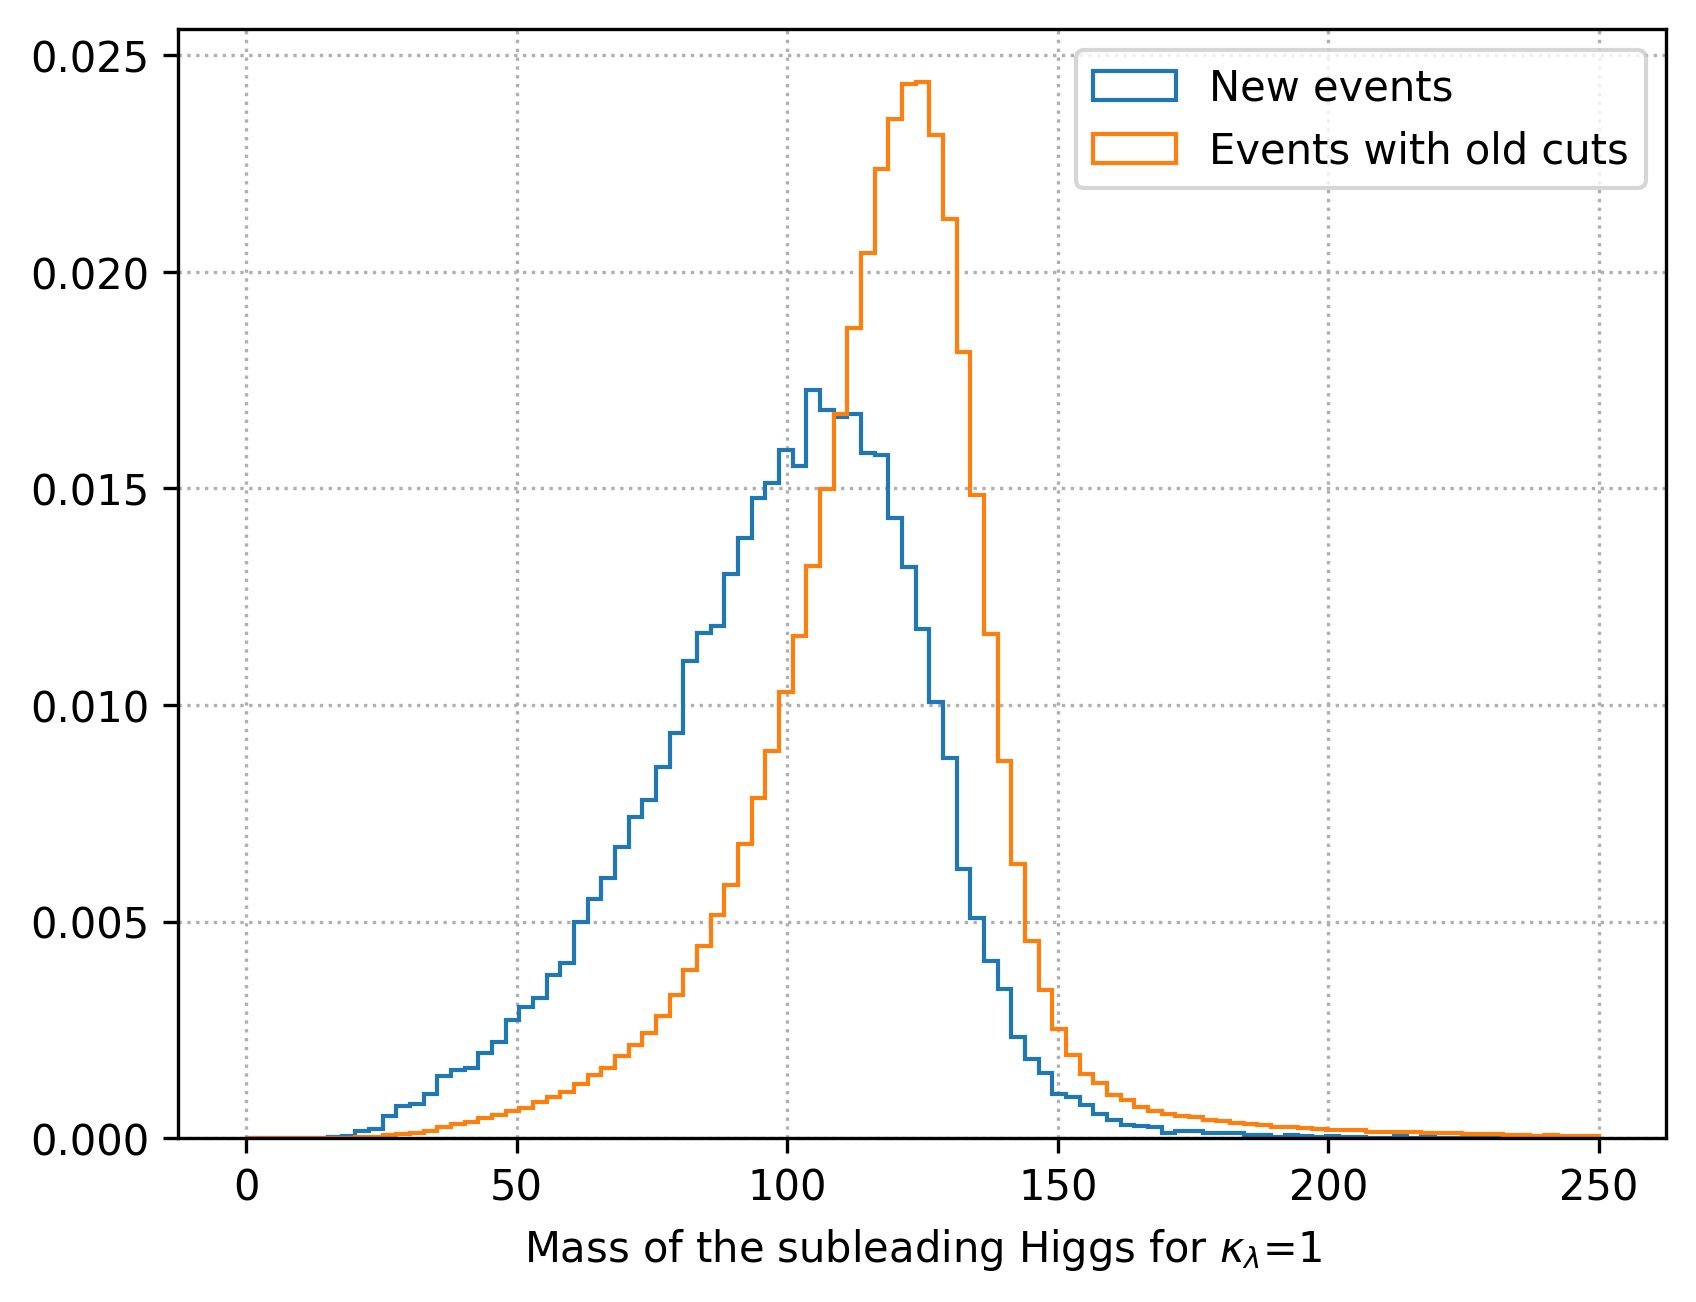

[68.9, 27.9, 49.6, 178, 74.8, 108, 89.3, ... 128, 364, 105, 109, 95.8, 189, 72.7]


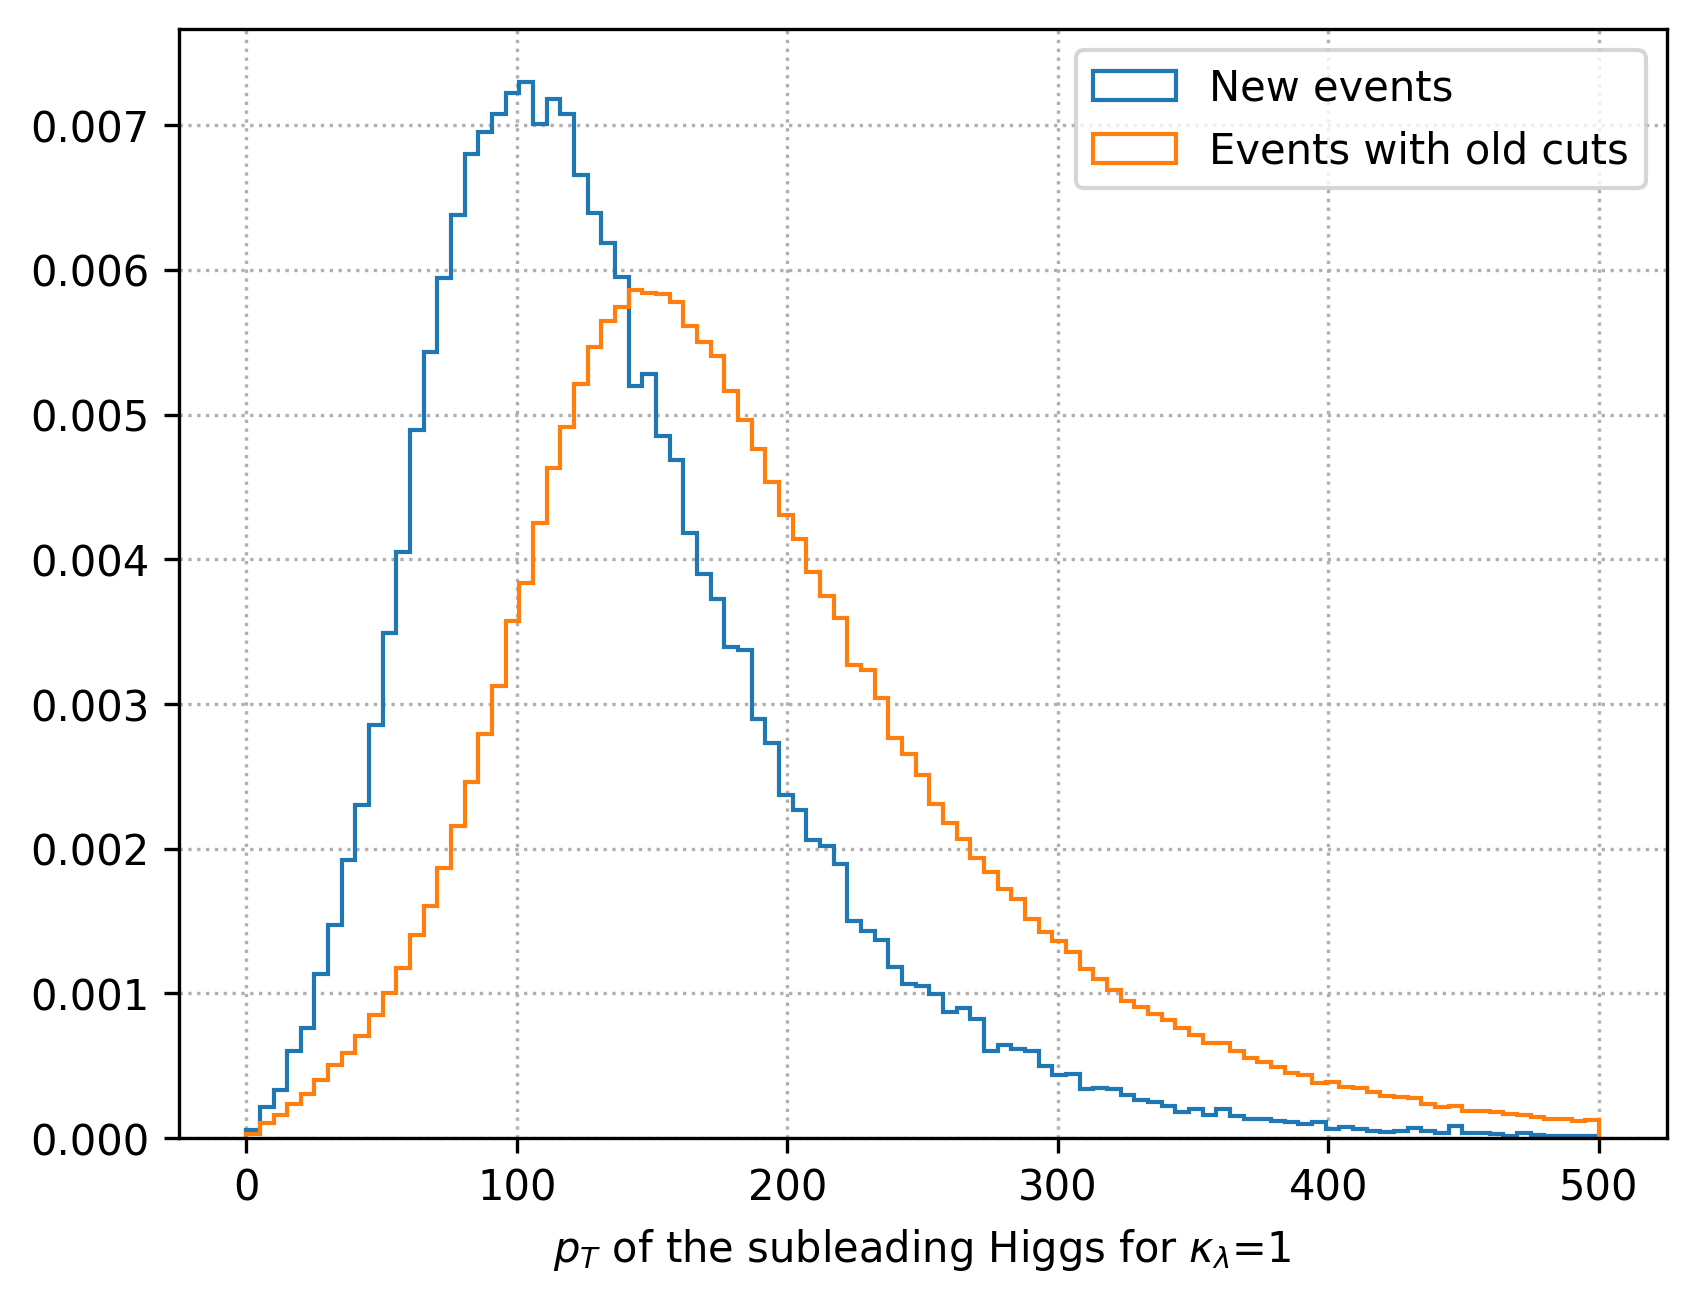

[79.6, 110, 41.2, 125, 83.9, 81.8, 109, 116, ... 110, 95.8, 115, 114, 129, 103, 127]


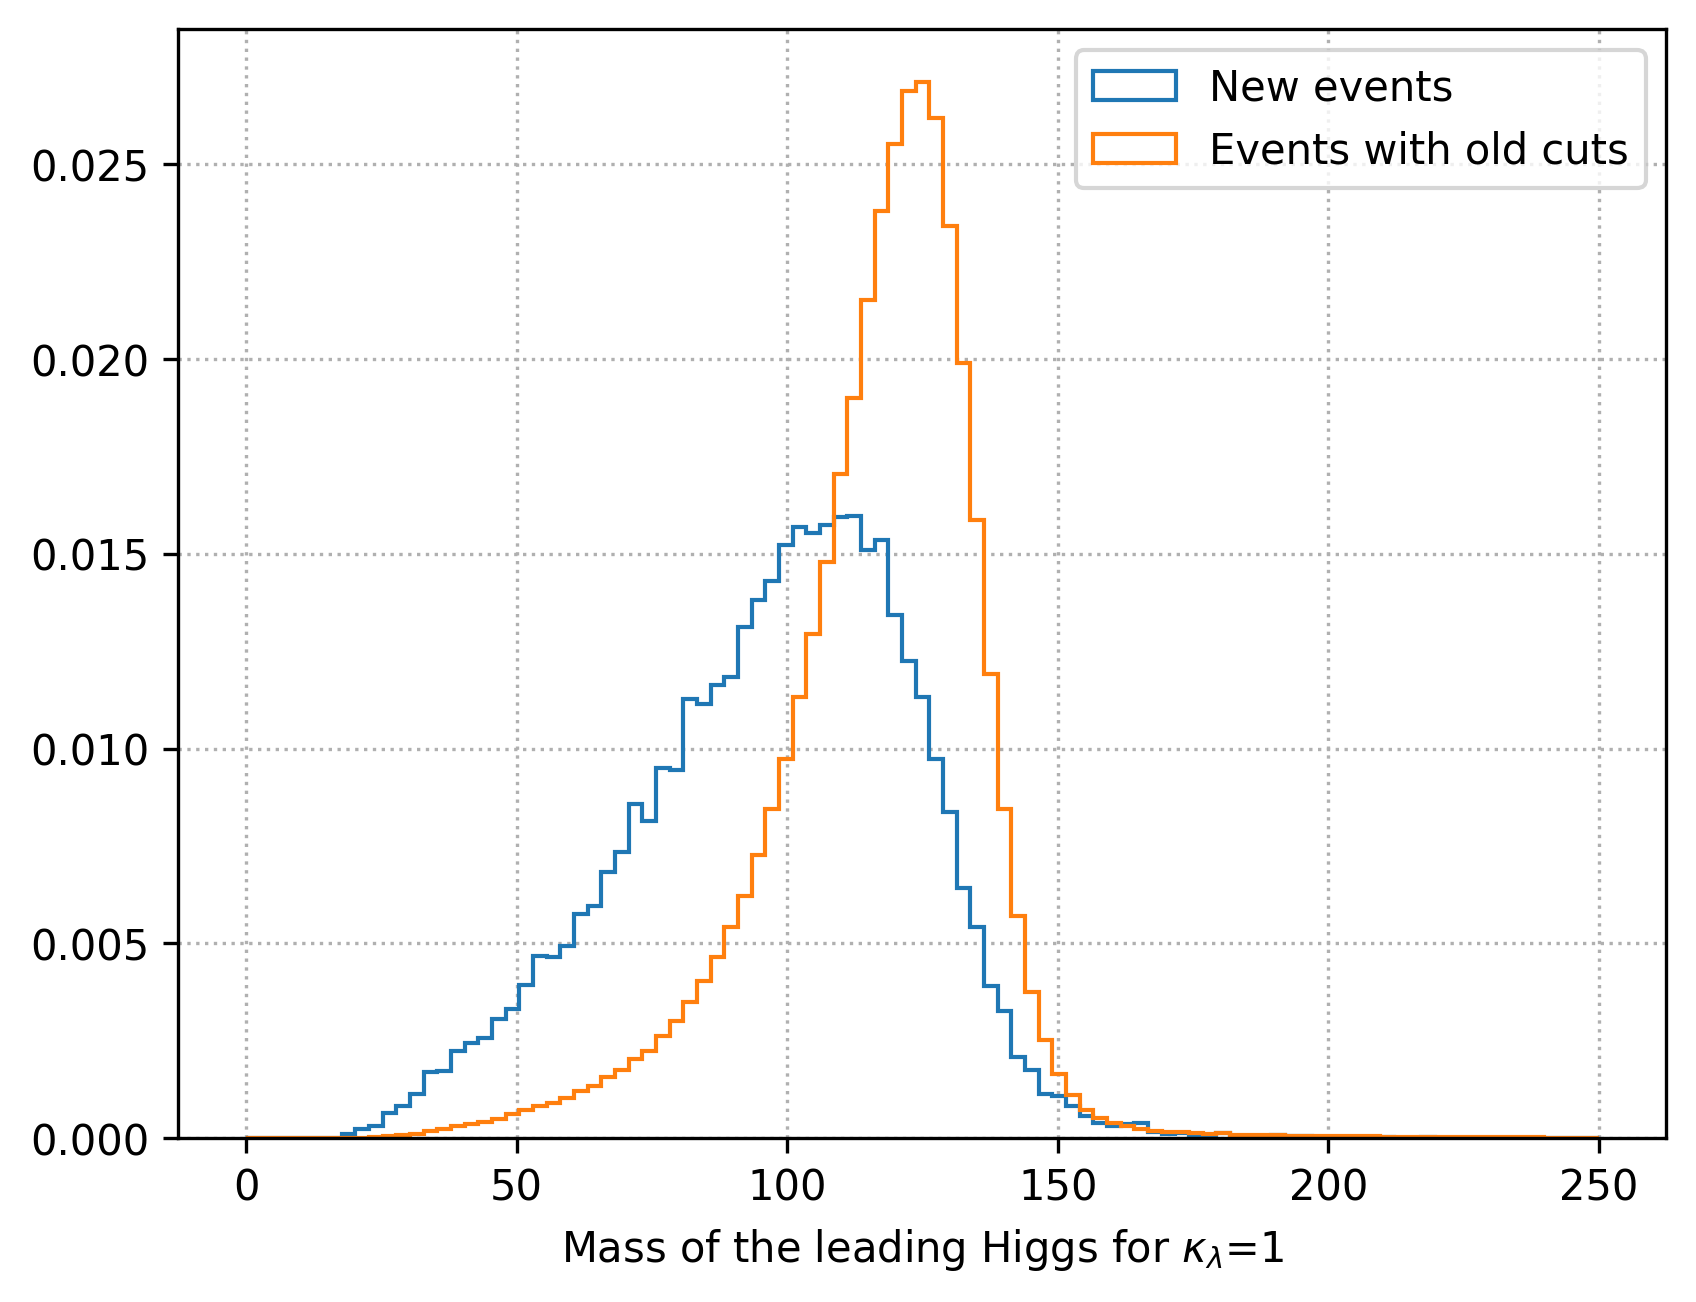

[157, 220, 122, 166, 137, 321, 226, 398, ... 182, 258, 246, 91.2, 211, 186, 223, 258]


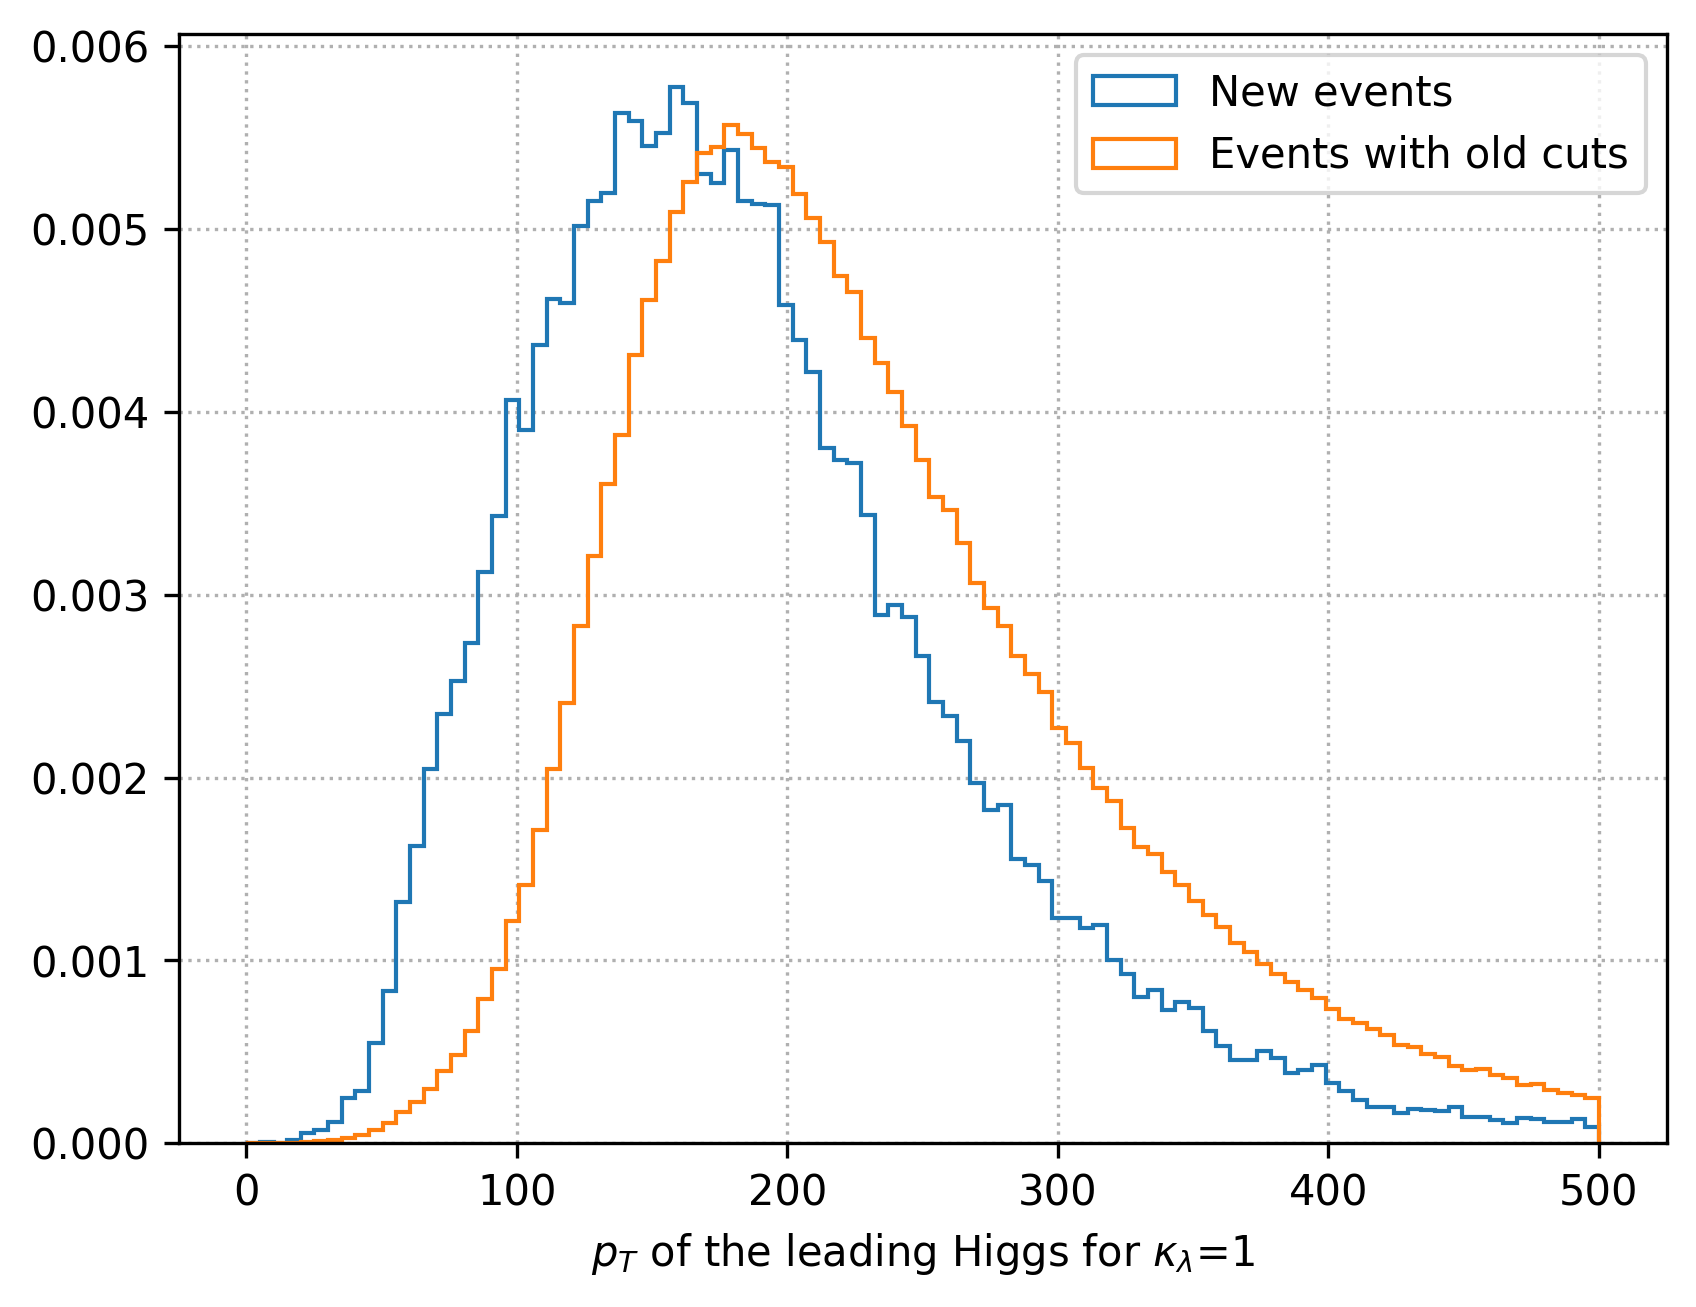

In [ ]:
plot_kinvar(reco_higgs_2_kl_1_mask,reco_higgs_2_kl_1,"mass","1",np.linspace(0,250,100),"subleading")
plot_kinvar(reco_higgs_2_kl_1_mask,reco_higgs_2_kl_1,"pt","1",np.linspace(0,500,100),"subleading")
plot_kinvar(reco_higgs_1_kl_1_mask,reco_higgs_1_kl_1,"mass","1",np.linspace(0,250,100),"leading")
plot_kinvar(reco_higgs_1_kl_1_mask,reco_higgs_1_kl_1,"pt","1",np.linspace(0,500,100),"leading")


In [ ]:
def reco_hh(kl_datasets):
    reco_hh = jet_four_vector_fully_matched(kl_datasets)[:,0]+ jet_four_vector_fully_matched(kl_datasets)[:,1] + jet_four_vector_fully_matched(kl_datasets)[:,2] + jet_four_vector_fully_matched(kl_datasets)[:,3]
    return reco_hh

def reco_hh_mask(kl_datasets):
    reco_hh = jet_four_vector_fully_matched_mask(kl_datasets)[:,0] + jet_four_vector_fully_matched_mask(kl_datasets)[:,1] + jet_four_vector_fully_matched_mask(kl_datasets)[:,2] + jet_four_vector_fully_matched_mask(kl_datasets)[:,3]
    return reco_hh

In [ ]:
reco_hh_kl_1=reco_hh(kl_1_new_cuts)
reco_hh_kl_0 =reco_hh(kl_0_new_cuts)
reco_hh_kl_2p45 =reco_hh(kl_2p45_new_cuts)
reco_hh_kl_5 =reco_hh(kl_5_new_cuts)

reco_hh_kl_1_mask=reco_hh_mask(kl_1_new_cuts)
reco_hh_kl_0_mask=reco_hh_mask(kl_0_new_cuts)
reco_hh_kl_2p45_mask=reco_hh_mask(kl_2p45_new_cuts)
reco_hh_kl_5_mask =reco_hh_mask(kl_5_new_cuts)

[491, 260, 457, 314, 381, 407, 318, 379, ... 396, 378, 325, 577, nan, 462, 519, 494]


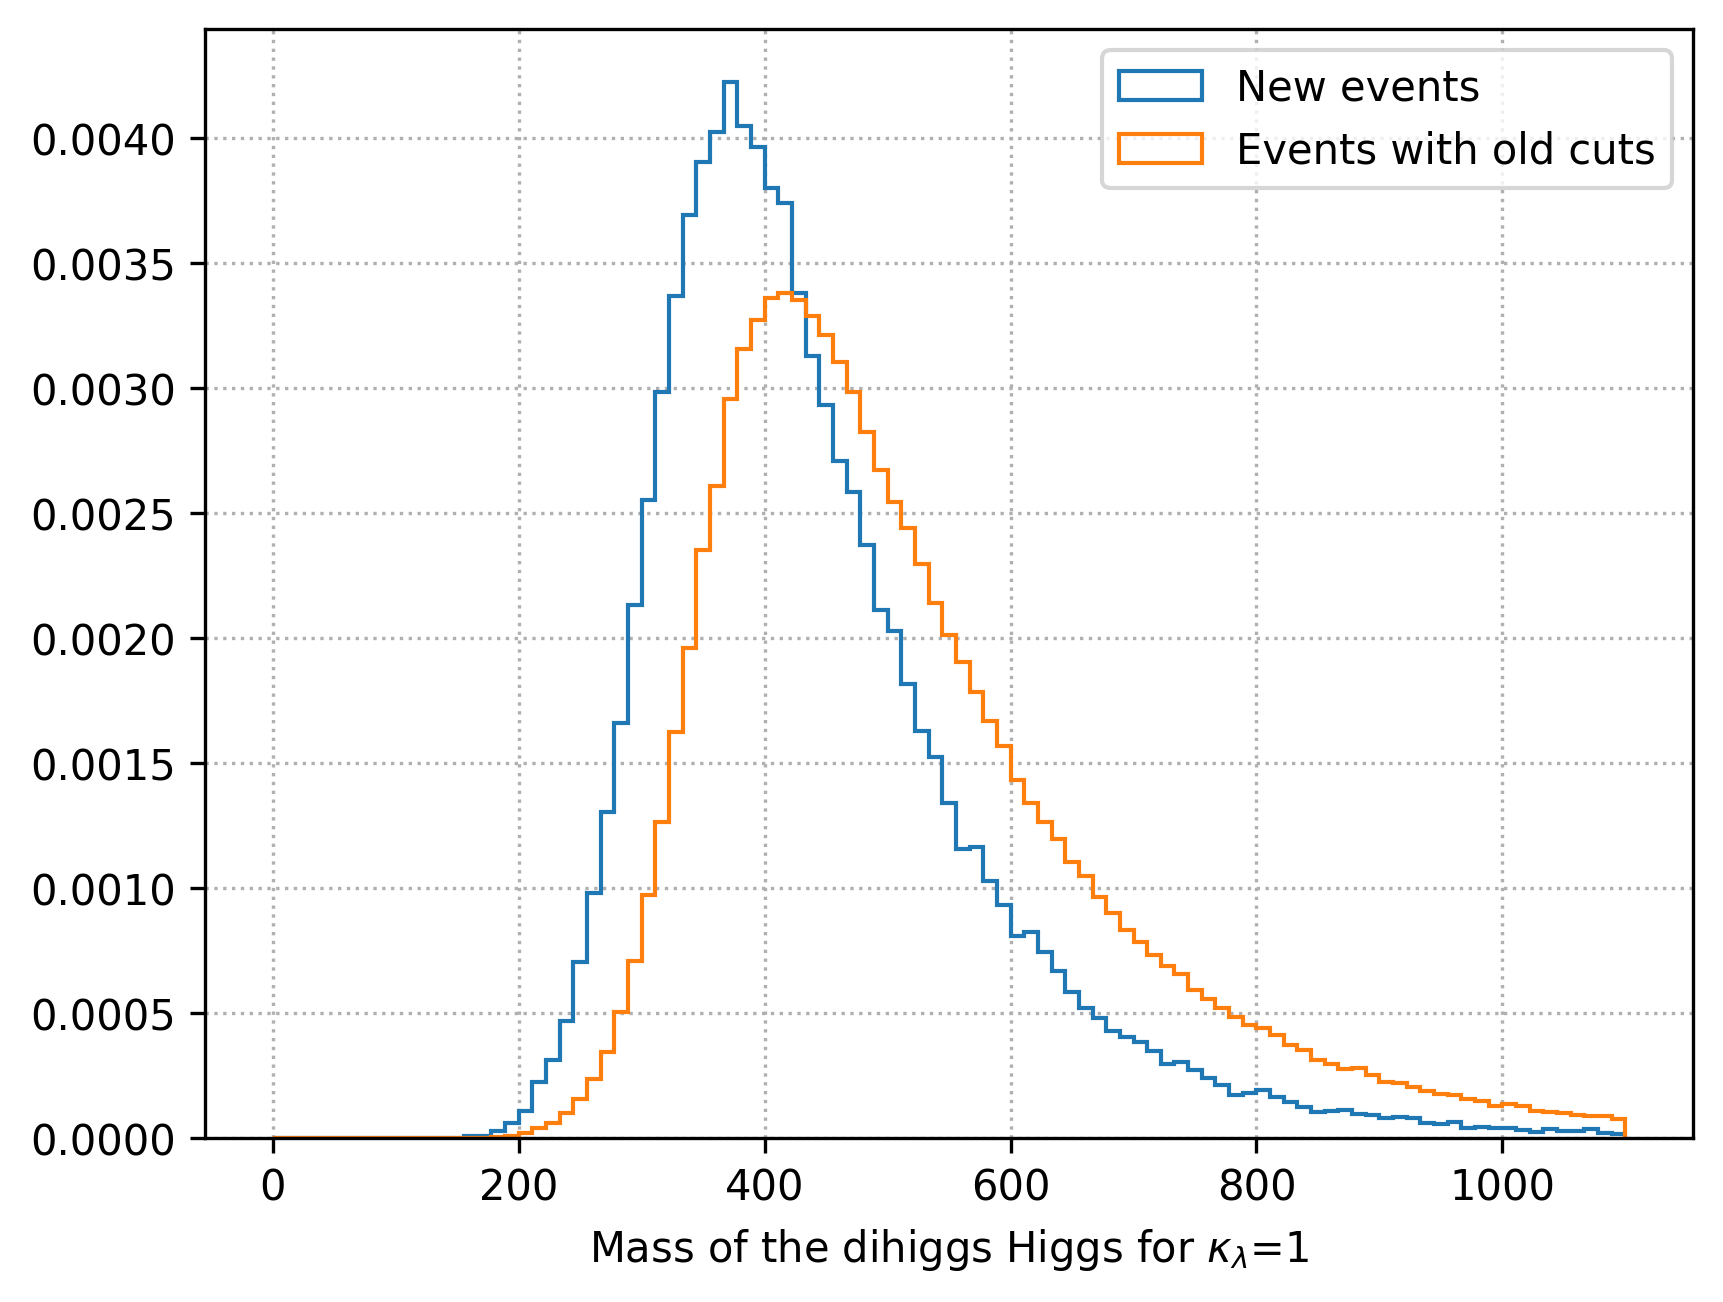

[76.3, 106, 41.8, 81.7, 167, 92.1, 186, ... 73.1, 31.1, 1.84e+03, 66.8, 107, 96.2]


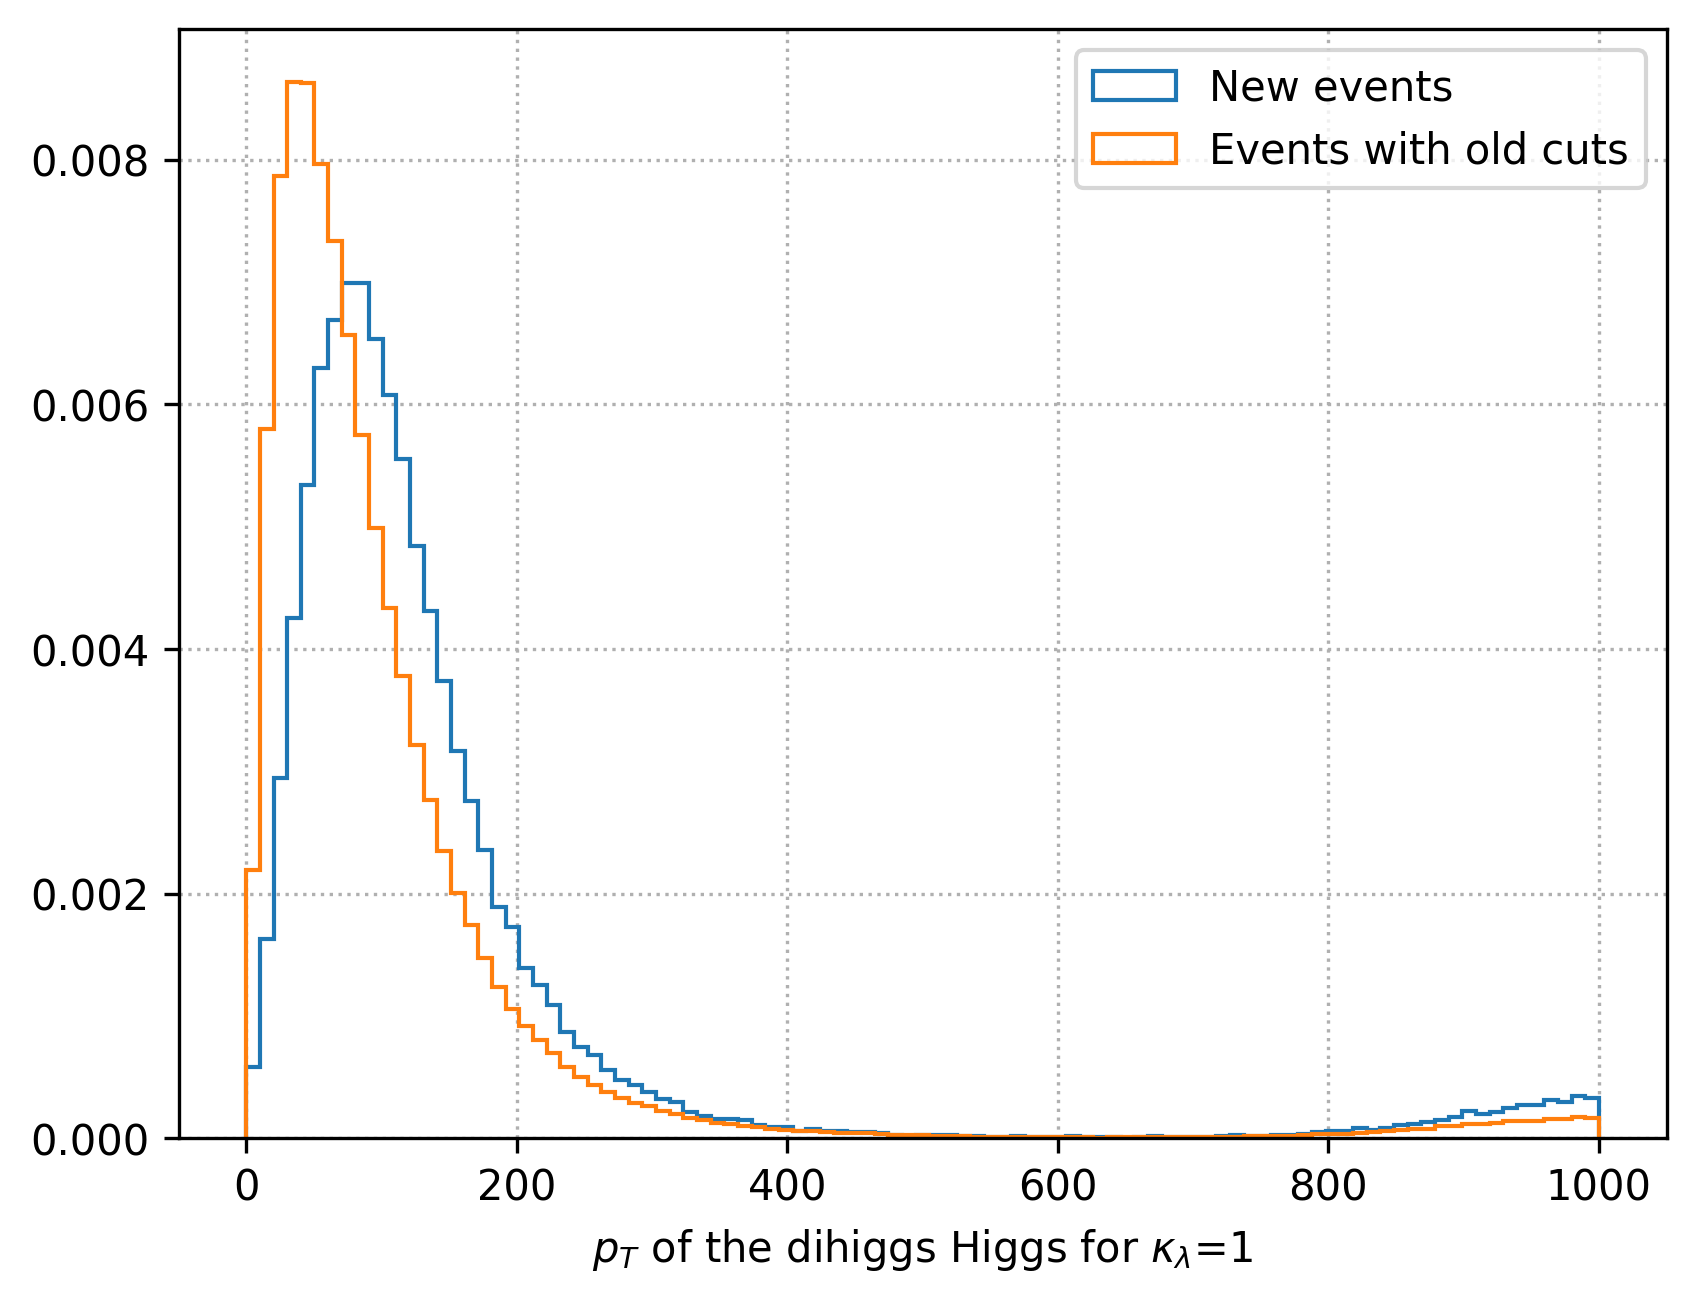

[448, 334, 492, 258, 461, 388, 269, 557, ... 207, 298, 391, 413, 571, 345, 302, 303]


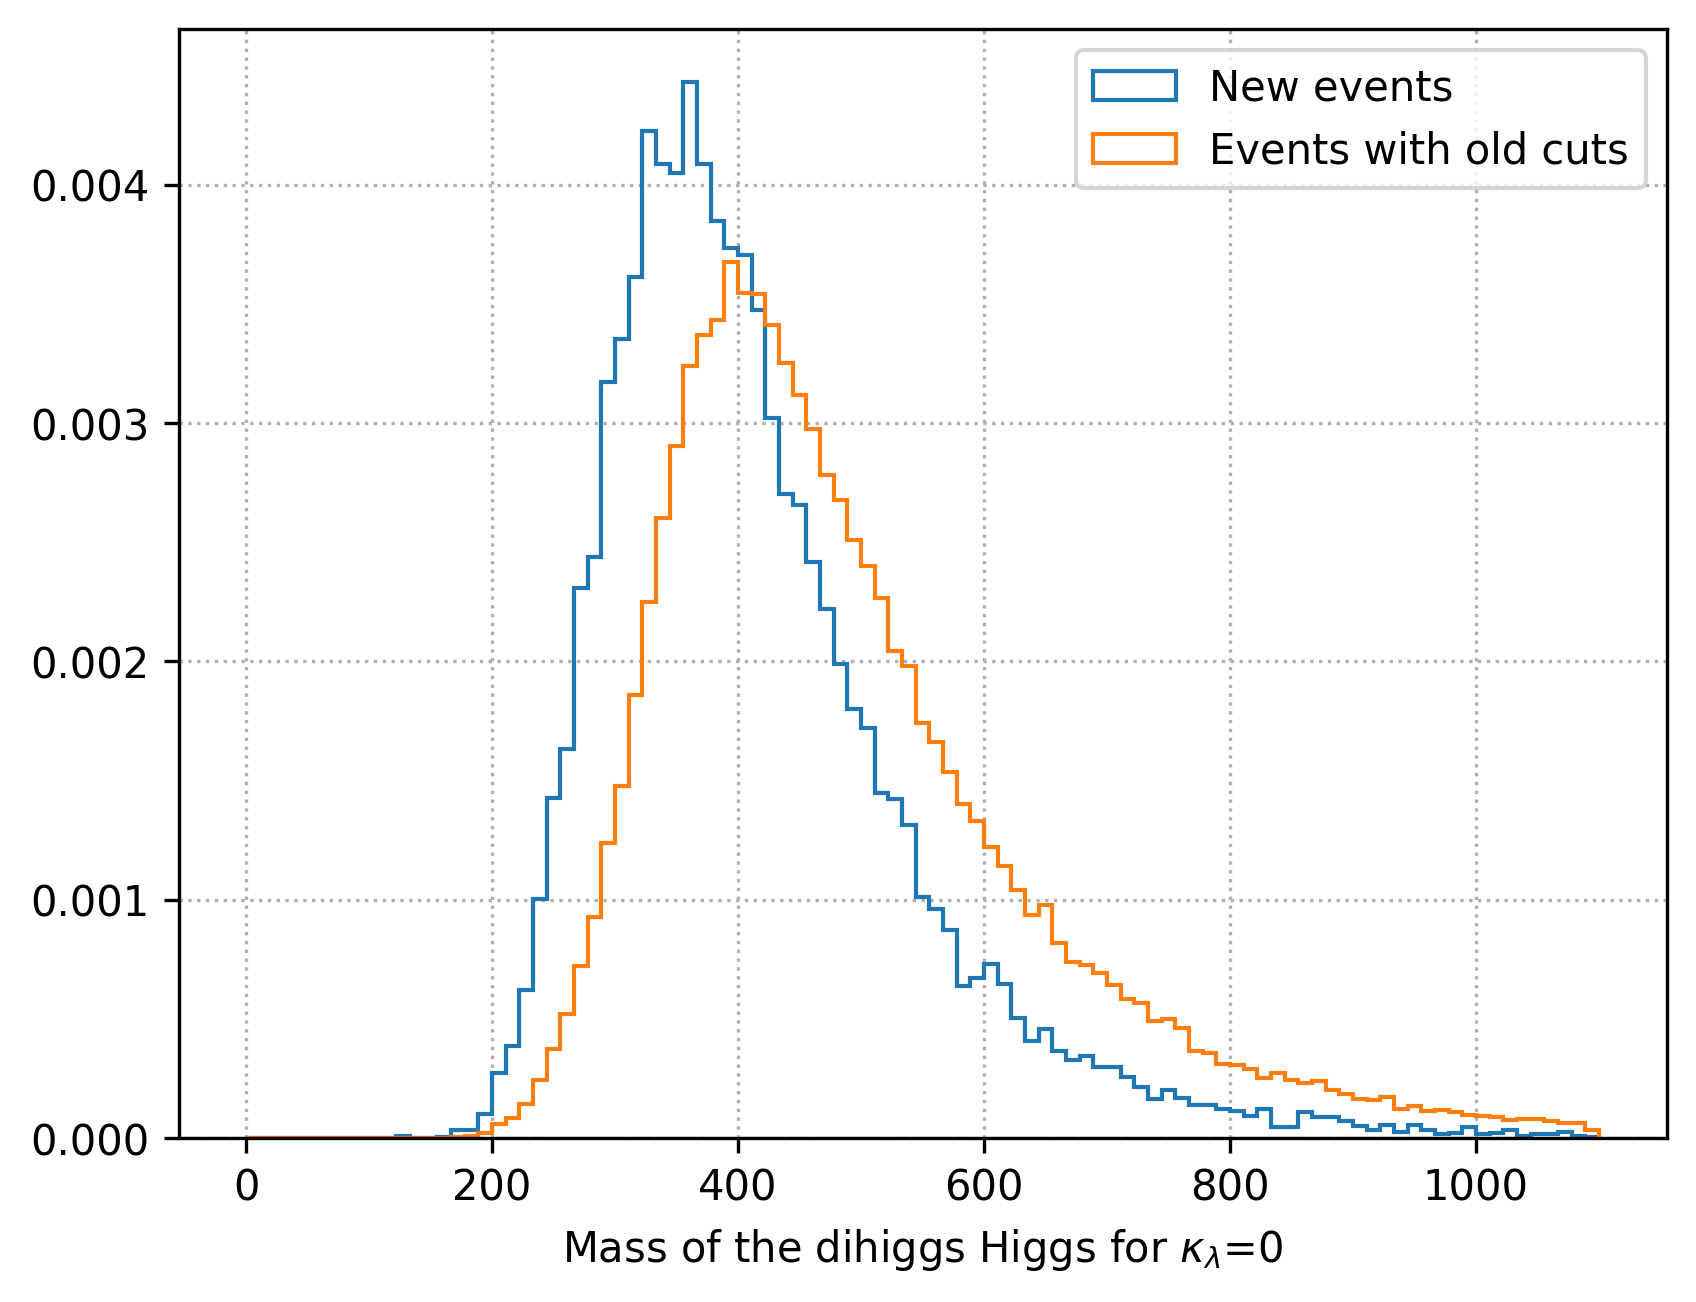

[149, 17.2, 35.4, 196, 66.4, 178, 145, ... 83.7, 83.8, 20.2, 309, 32.7, 174, 148]


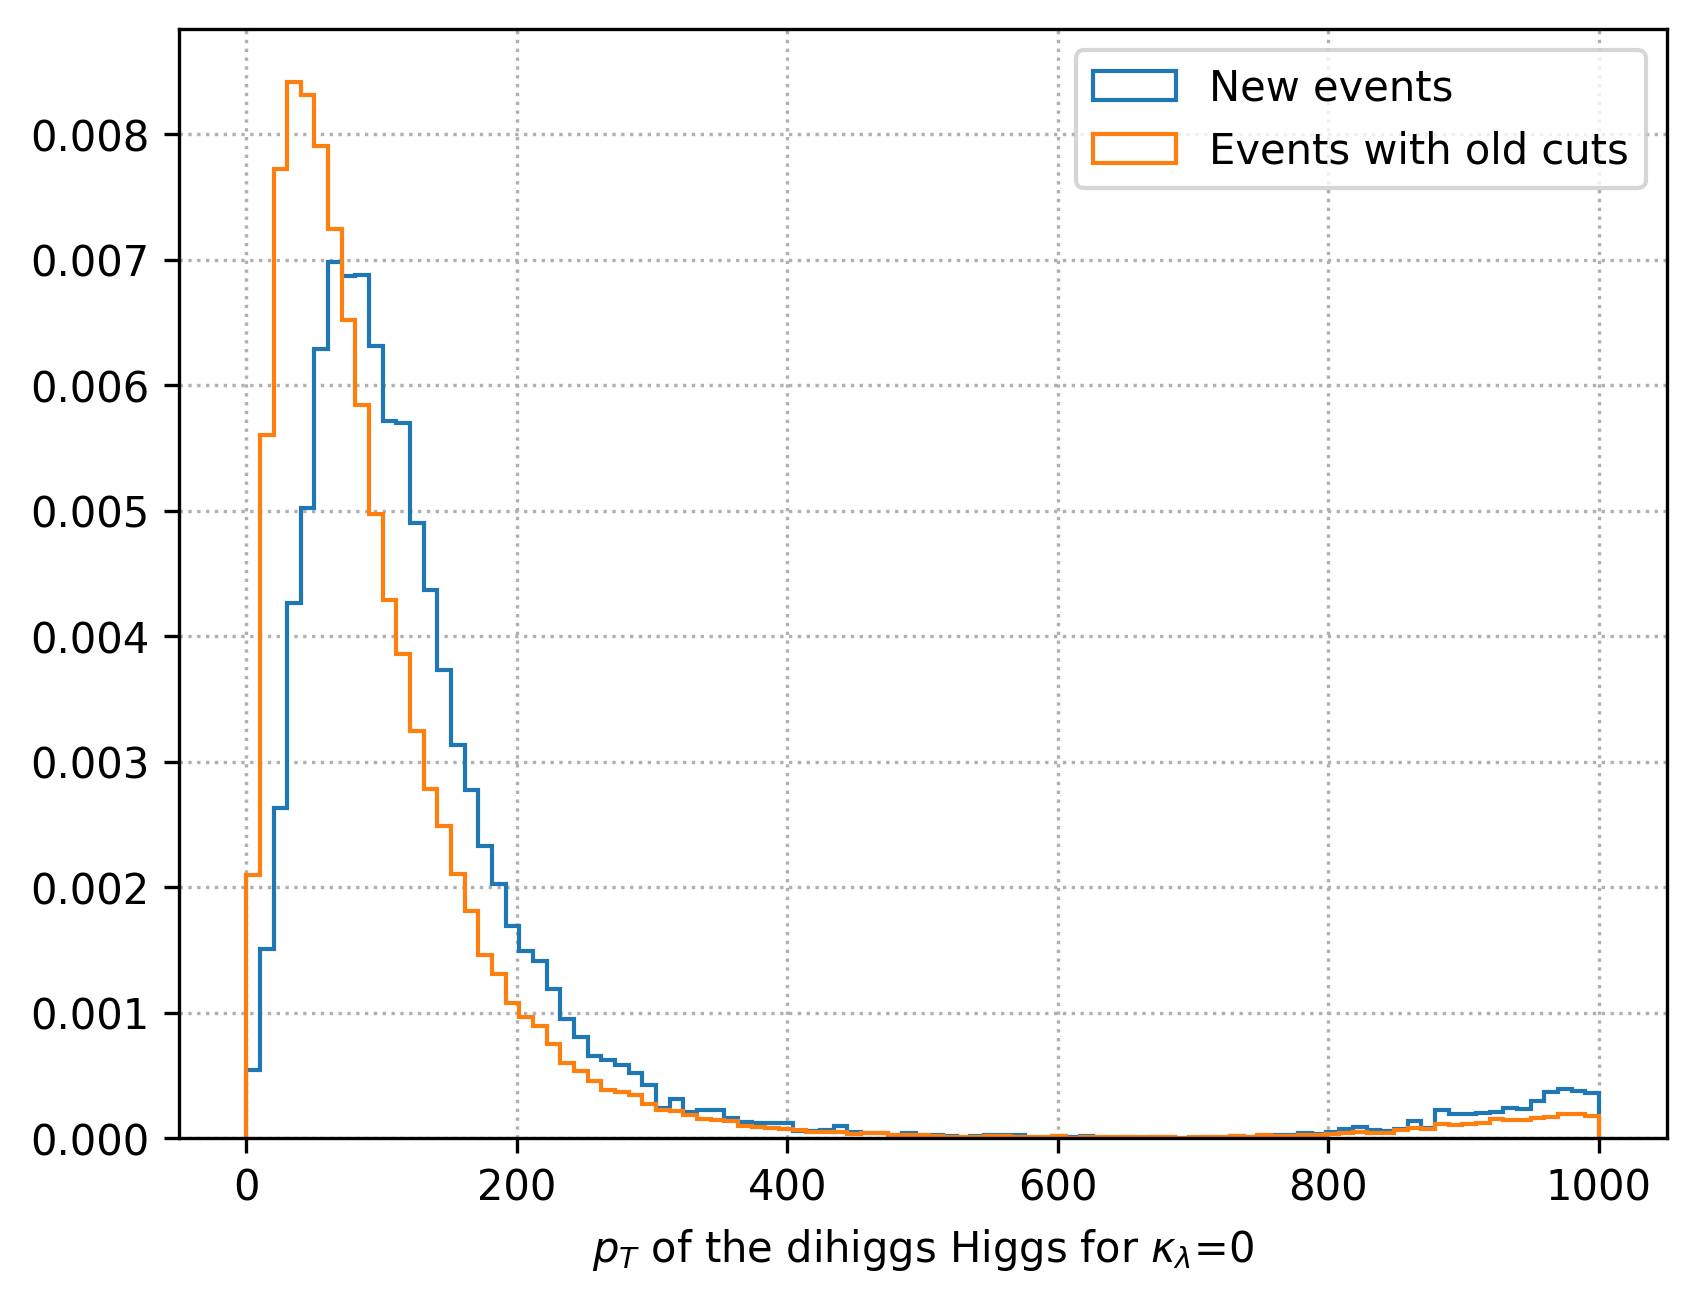

[240, 443, nan, 407, 507, 471, 385, 298, ... 321, 361, 756, 615, 505, 295, 520, 822]


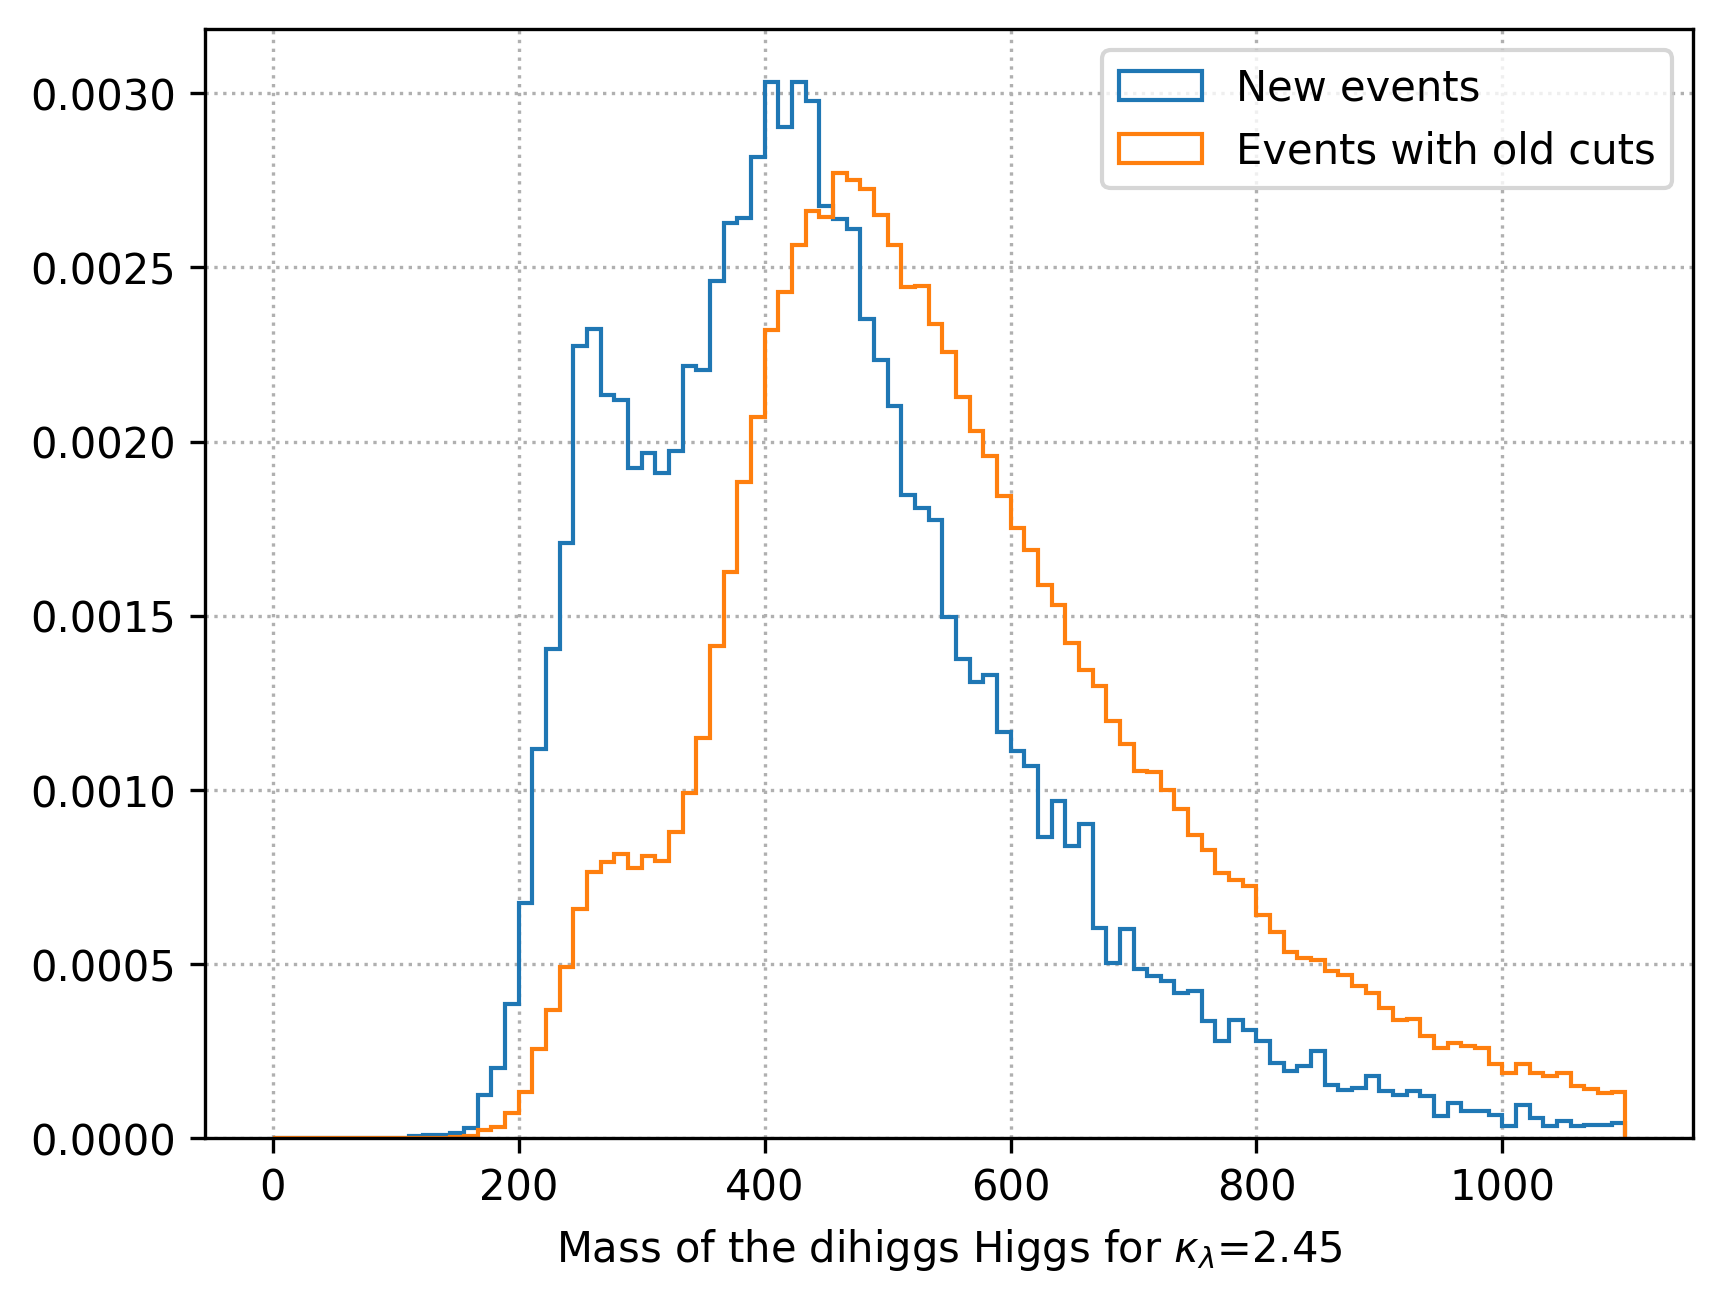

[198, 52, 941, 152, 330, 59.2, 294, 105, ... 258, 61.7, 209, 223, 533, 158, 196, 168]


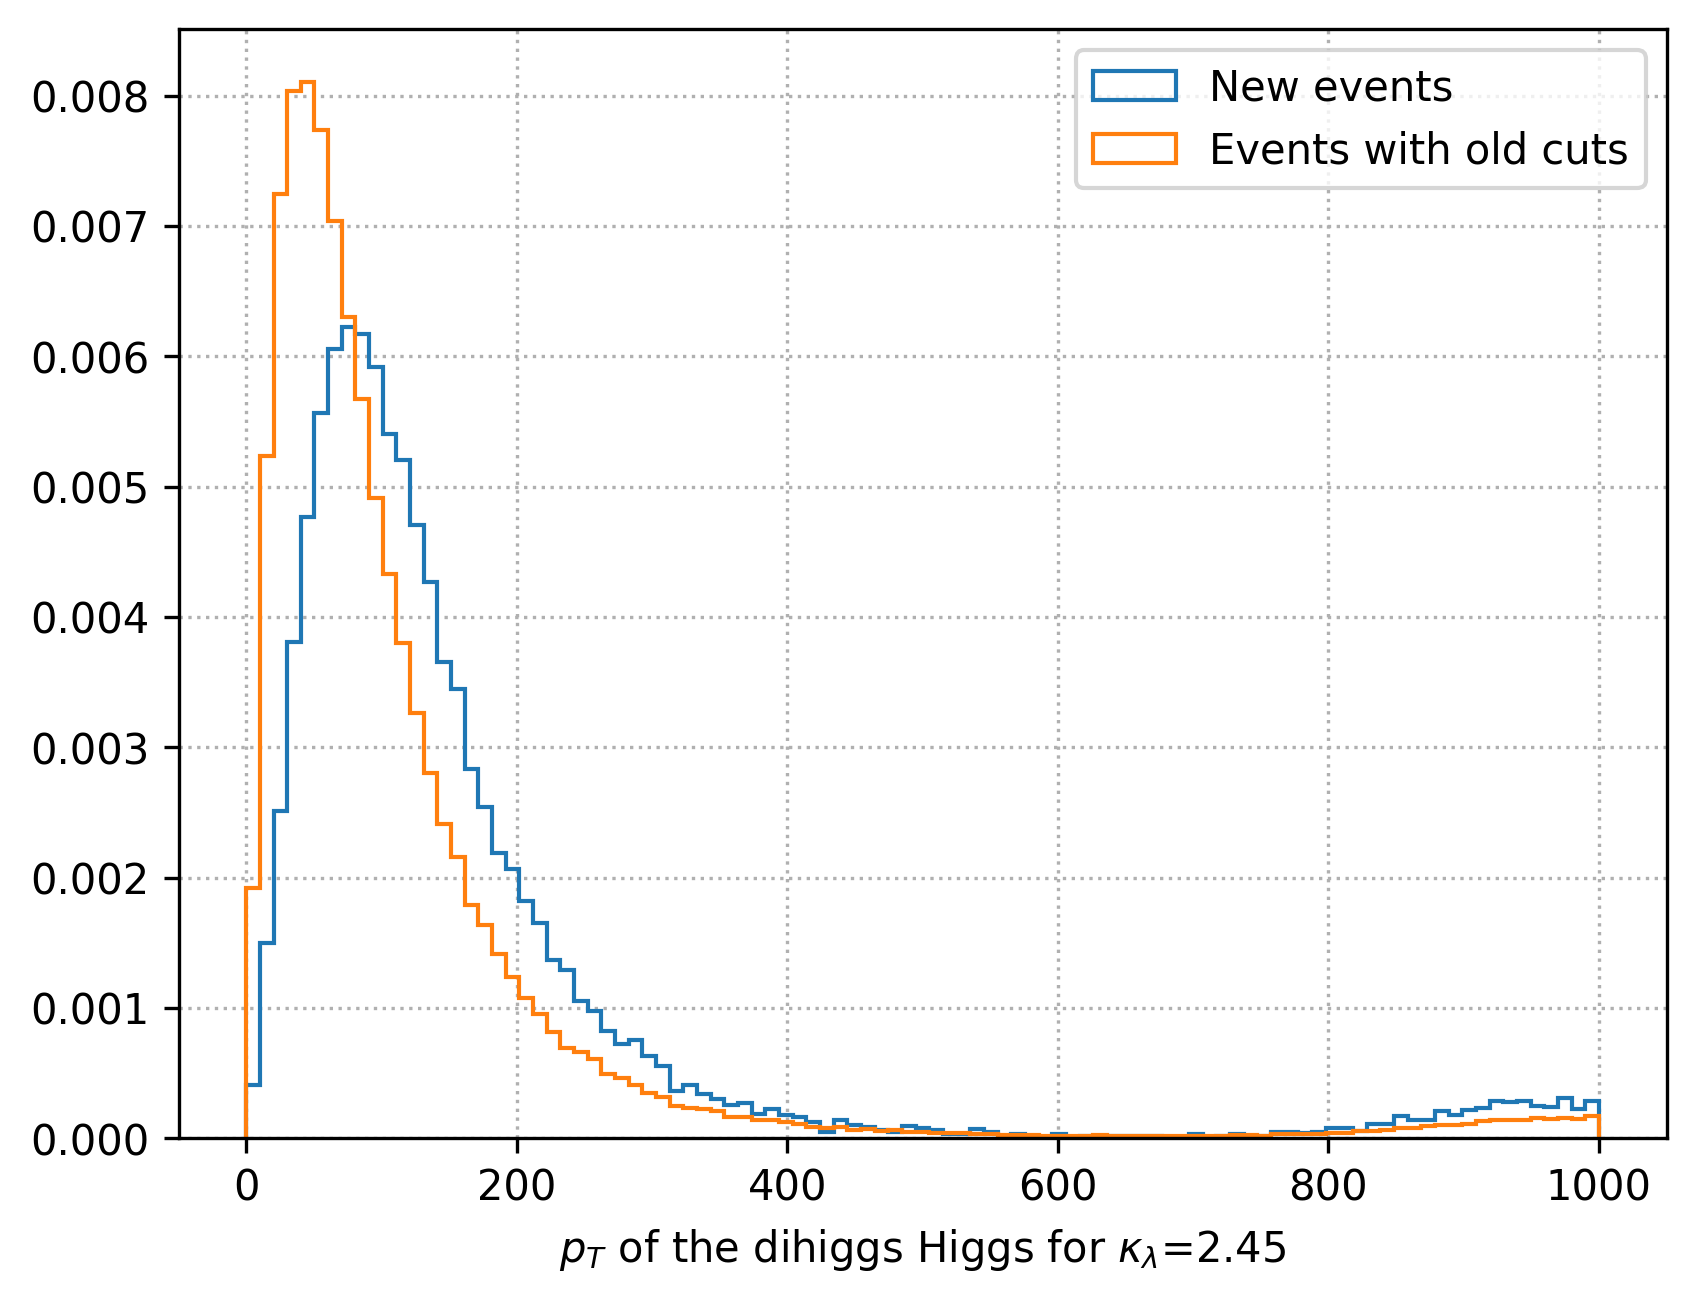

[306, 310, 249, 305, 212, 327, 266, 254, ... 277, nan, 301, 293, 224, 270, 301, 315]


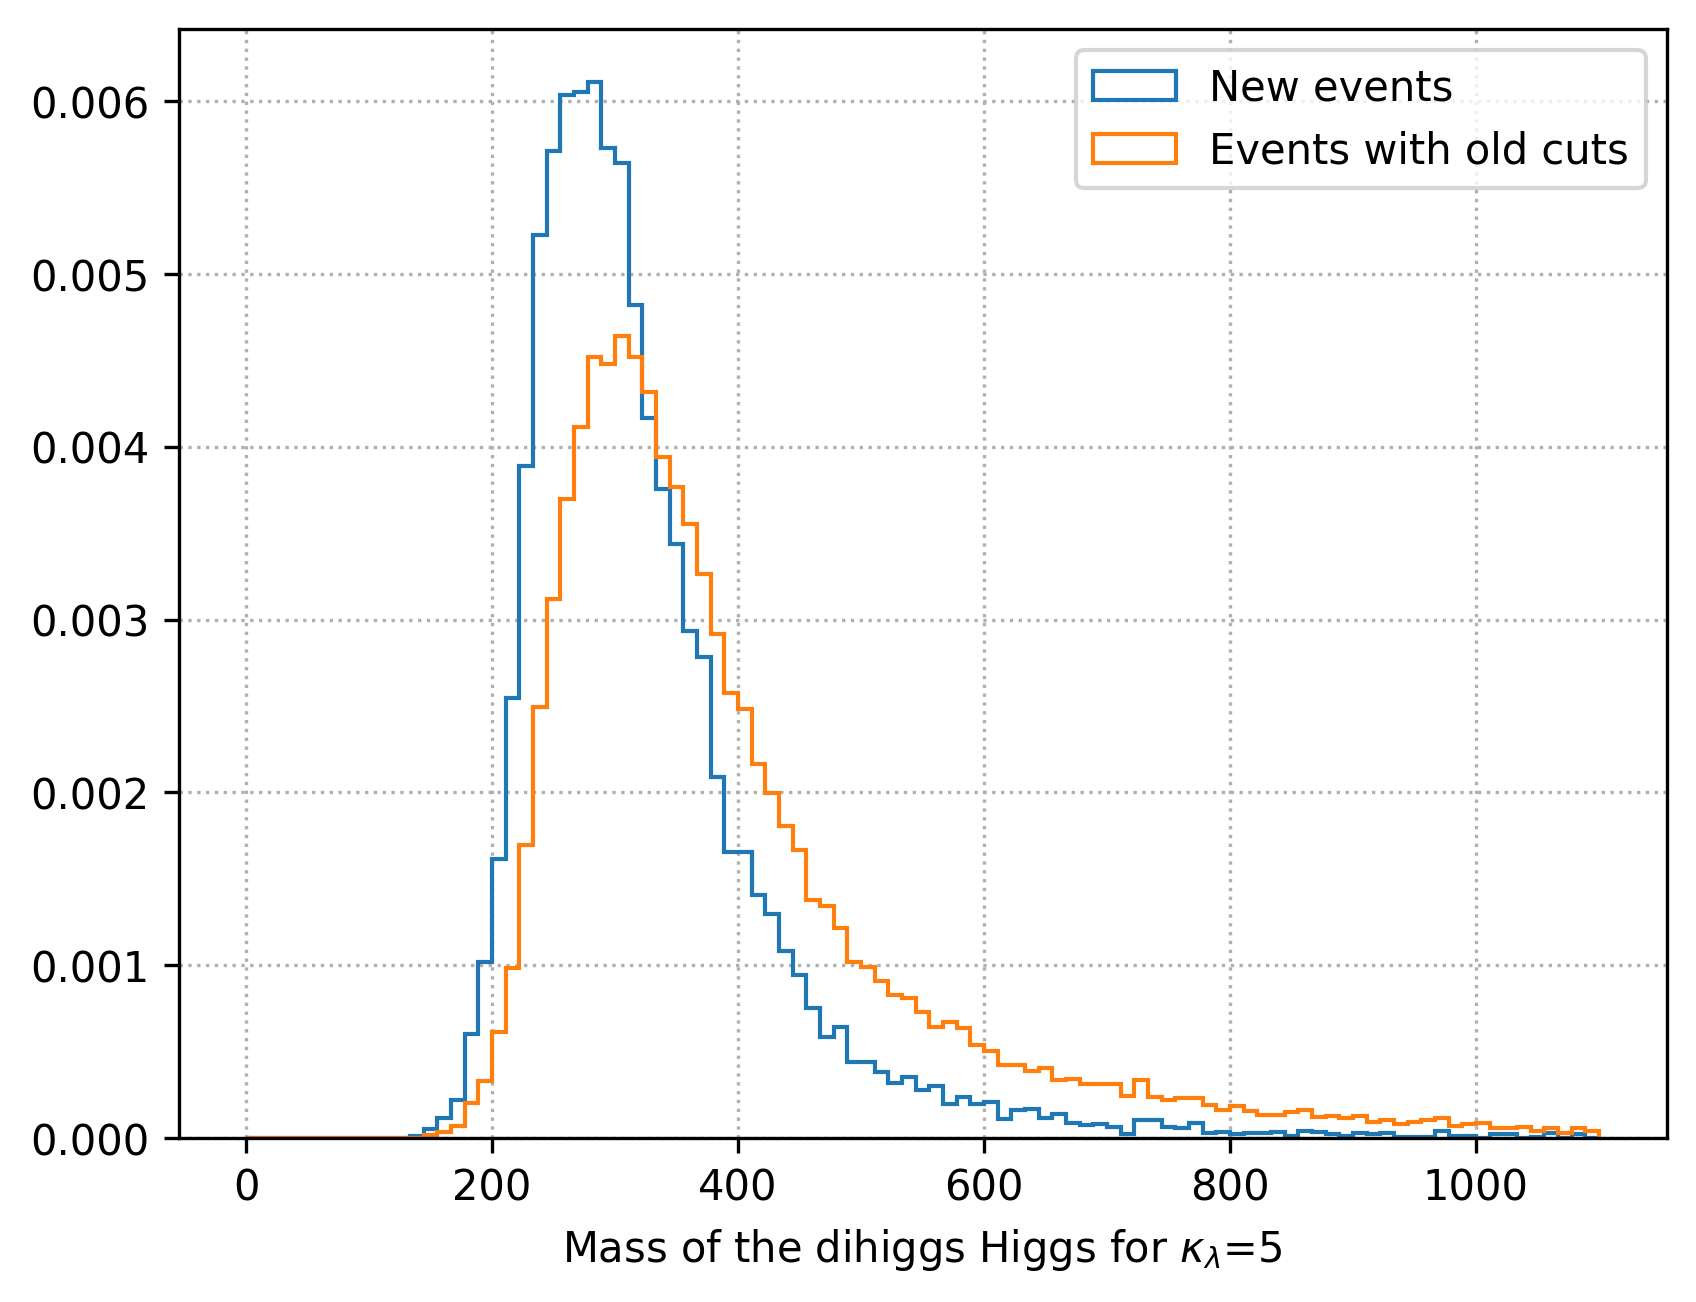

[342, 78.1, 94.4, 51.4, 143, 118, 184, 42.2, ... 995, 75.9, 141, 139, 44.7, 177, 135]


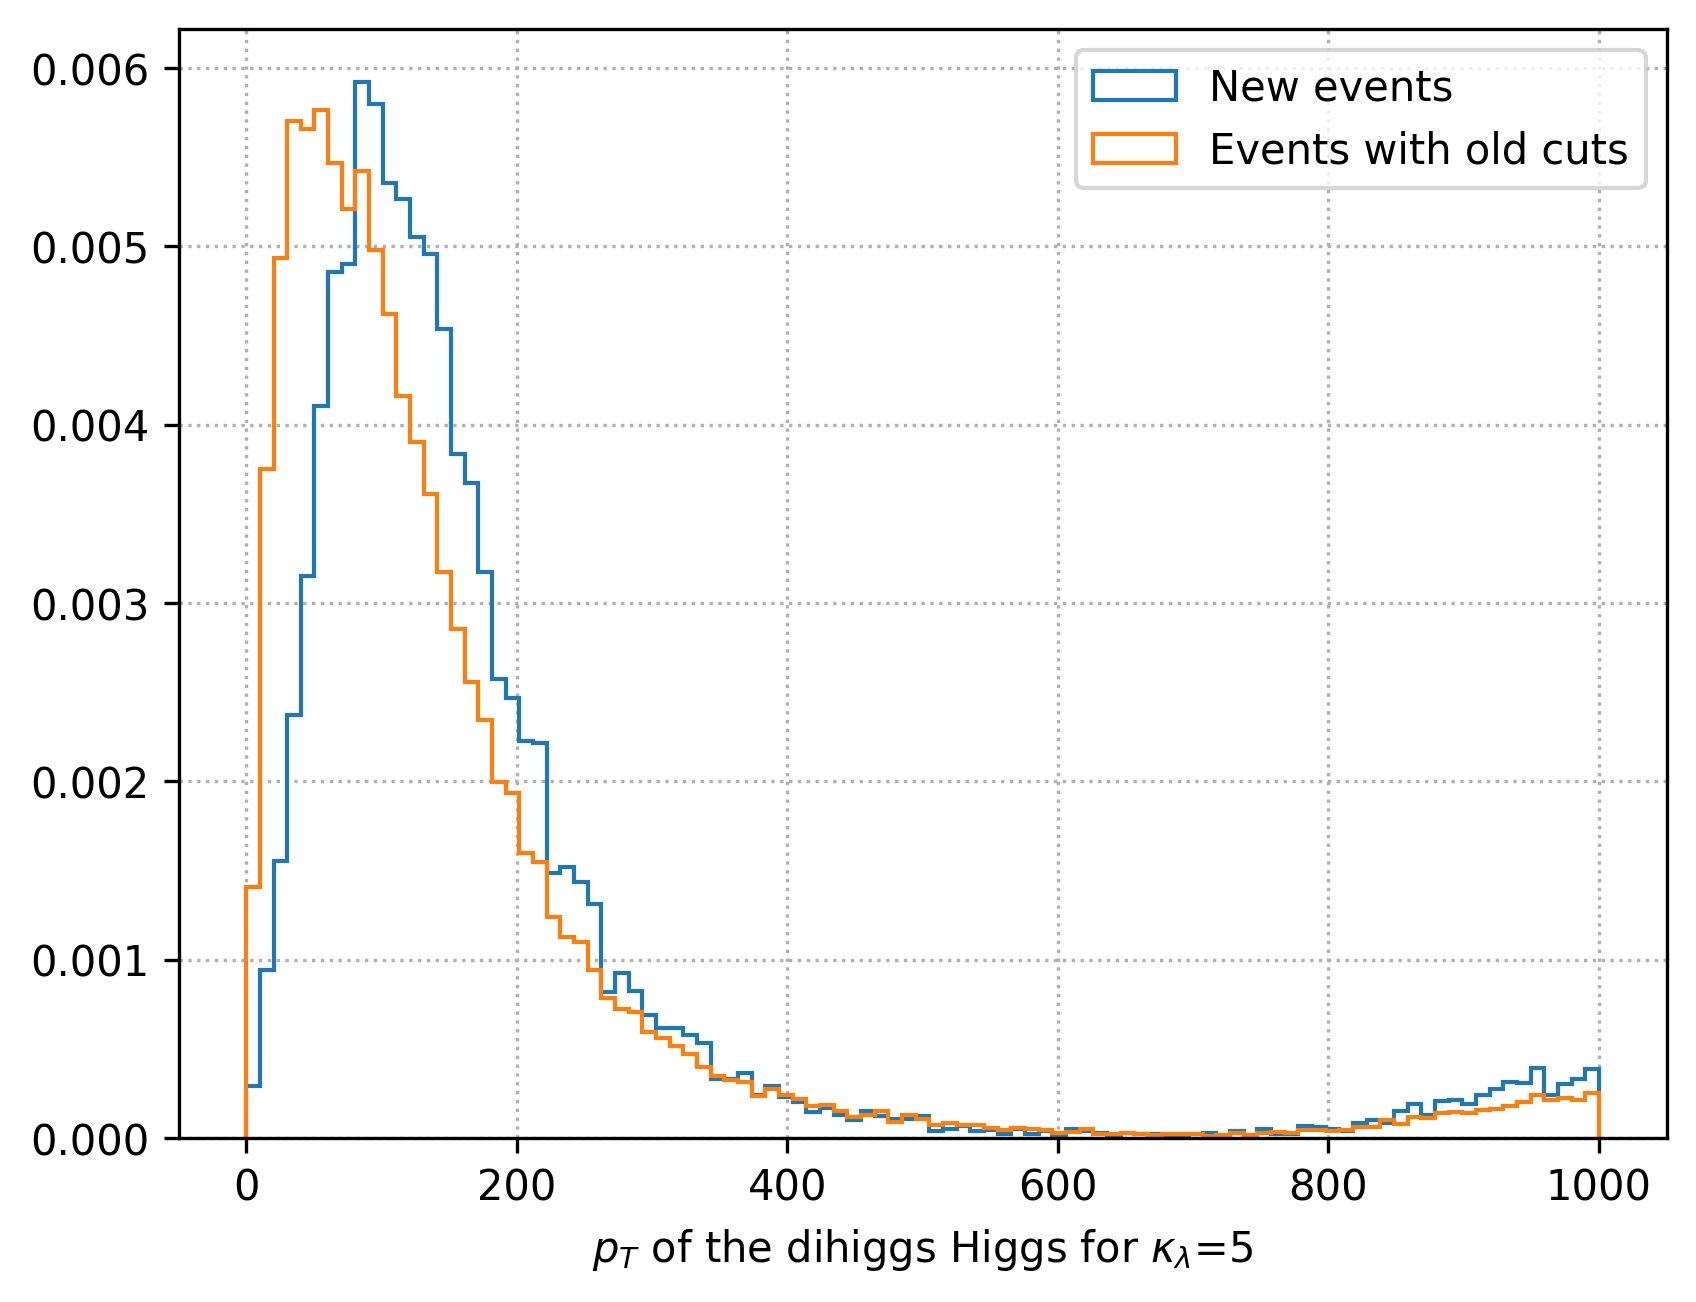

In [ ]:
plot_kinvar(reco_hh_kl_1_mask,reco_hh_kl_1,"mass","1",np.linspace(0,1100,100),"dihiggs")
plot_kinvar(reco_hh_kl_1_mask,reco_hh_kl_1,"pt","1",np.linspace(0,1000,100),"dihiggs")
plot_kinvar(reco_hh_kl_0_mask,reco_hh_kl_0,"mass","0",np.linspace(0,1100,100),"dihiggs")
plot_kinvar(reco_hh_kl_0_mask,reco_hh_kl_0,"pt","0",np.linspace(0,1000,100),"dihiggs")
plot_kinvar(reco_hh_kl_2p45_mask,reco_hh_kl_2p45,"mass","2.45",np.linspace(0,1100,100),"dihiggs")
plot_kinvar(reco_hh_kl_2p45_mask,reco_hh_kl_2p45,"pt","2.45",np.linspace(0,1000,100),"dihiggs")
plot_kinvar(reco_hh_kl_5_mask,reco_hh_kl_5,"mass","5",np.linspace(0,1100,100),"dihiggs")
plot_kinvar(reco_hh_kl_5_mask,reco_hh_kl_5,"pt","5",np.linspace(0,1000,100),"dihiggs")

## Plotting the kinematic variables for different $\kappa_\lambda$ datasets at jet level 


In [ ]:
def jet_four_flat_35mask(kl_dataset):
    #jet_prov_unflat=ak.unflatten(kl_dataset["JetGoodHiggs_provenance"],kl_dataset["JetGoodHiggs_N"] )
    jet_pt_flat=kl_dataset["JetGoodMatched_ptPnetRegNeutrino"]
    jet_eta_flat=kl_dataset["JetGoodMatched_eta"]
    jet_phi_flat=kl_dataset["JetGoodMatched_phi"]
    jet_mass_flat=kl_dataset["JetGoodMatched_mass"]
    jet_btag_flat=kl_dataset["JetGoodMatched_btagPNetB"]
    # print(jet_pt_flat)
    # mask_pt_35= ak.any((jet_pt_unflat<35),axis=1)
    # mask_pt_0= ak.all((0<jet_pt_unflat),axis=1)

    mask=(jet_pt_flat<35) & (0<jet_pt_flat)
    # print(mask)
    jet = ak.zip(
        {
            "pt": jet_pt_flat[mask],
            "eta": jet_eta_flat[mask],  # Assume you have jet_eta_unflat similarly defined
            "phi": jet_phi_flat[mask],  # Assume you have jet_phi_unflat similarly defined
            "mass": jet_mass_flat[mask],  # Assume you have jet_mass_unflat similarly defined
            "btag": jet_btag_flat[mask],  # Assume you have jet_btag_unflat similarly defined
            #"prov": jet_prov_unflat
        }, with_name="Momentum4D"
    )

    return jet

In [ ]:
jet_kl1_nc_mask_flat=jet_four_flat_35mask(kl_1_new_cuts)
jet_kl0_nc_mask_flat=jet_four_flat_35mask(kl_0_new_cuts)
jet_kl2p45_nc_mask_flat=jet_four_flat_35mask(kl_2p45_new_cuts)
jet_kl5_nc_mask_flat=jet_four_flat_35mask(kl_0_new_cuts)

jet_kl1_oc_mask_flat=jet_four_flat_35mask(kl_1_old_cuts)
jet_kl0_oc_mask_flat=jet_four_flat_35mask(kl_0_old_cuts)
jet_kl2p45_oc_mask_flat=jet_four_flat_35mask(kl_2p45_old_cuts)
jet_kl5_oc_mask_flat=jet_four_flat_35mask(kl_5_old_cuts)

print(jet_kl1_nc_mask_flat.pt[:2])


[34.9, 29.5]


In [ ]:
def plot_kinvar_flat(new_ev, kl_full_dataset, kinvar,kl,bins):
    print(getattr(new_ev, kinvar))
    print(getattr(kl_full_dataset, kinvar))
    flat_ne=(getattr(new_ev, kinvar))
    flat_full=ak.flatten(getattr(kl_full_dataset, kinvar))
    print(flat_ne)
    plt.hist(flat_ne,bins, histtype="step",density=True,label="New events")
    plt.hist(flat_full, bins,histtype="step",density=True,label="Events with old cuts")
    if kinvar=="pt":
        pt_label=r"$p_T$ for $\kappa_\lambda$=" + kl
        plt.xlabel(pt_label)
    elif kinvar=="btag":
        btag_label=r"Btag score for $\kappa_\lambda$=" + kl
        plt.xlabel(btag_label)
    elif kinvar=="eta":
        eta_label=r"$\eta$ score for $\kappa_\lambda$=" + kl
        plt.xlabel(eta_label)
    elif kinvar=="btag":
        phi_label=r"$\phi$ score for $\kappa_\lambda$=" + kl
        plt.xlabel(phi_label)
    plt.grid(linestyle=":")
    plt.legend()
    plt.show()

[0.999, 0.948, 0.773, 0.86, 0.999, 0.968, ... 0.999, 0.998, 0.814, 1, 0.511, 0.998]
[[1, 0.993, 0.982, 0.67], [1, 0.999, ... 0.992, 0.424], [1, 0.987, 0.963, 0.865]]
[0.999, 0.948, 0.773, 0.86, 0.999, 0.968, ... 0.999, 0.998, 0.814, 1, 0.511, 0.998]


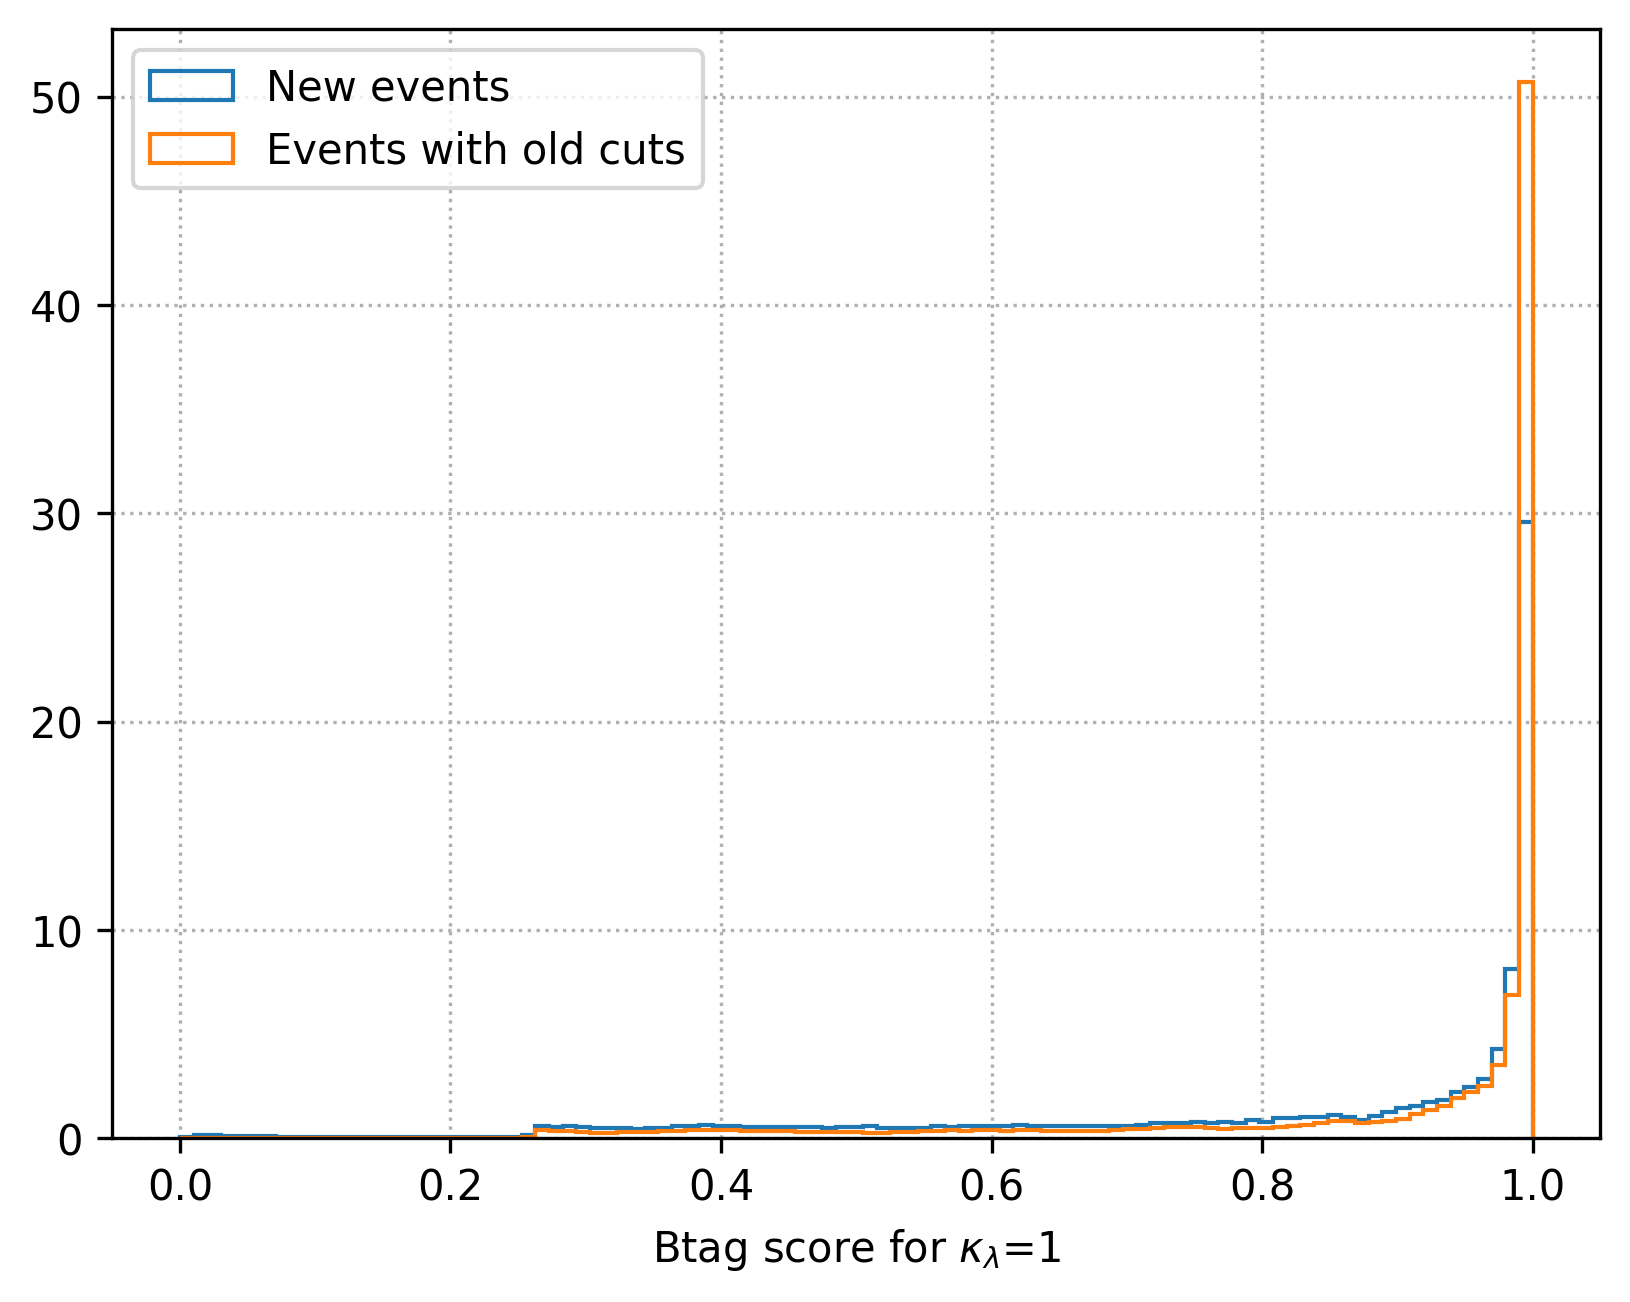

[34.9, 29.5, 26.9, 28, 34.6, 27.4, 34.4, ... 31.3, 26.8, 27.8, 33.6, 25.1, 31.2]
[[101, 108, 89.9, 68.5], [282, 160, 231, ... 172, 61.6], [82.4, 97.1, 65.6, 64.9]]
[34.9, 29.5, 26.9, 28, 34.6, 27.4, 34.4, ... 31.3, 26.8, 27.8, 33.6, 25.1, 31.2]


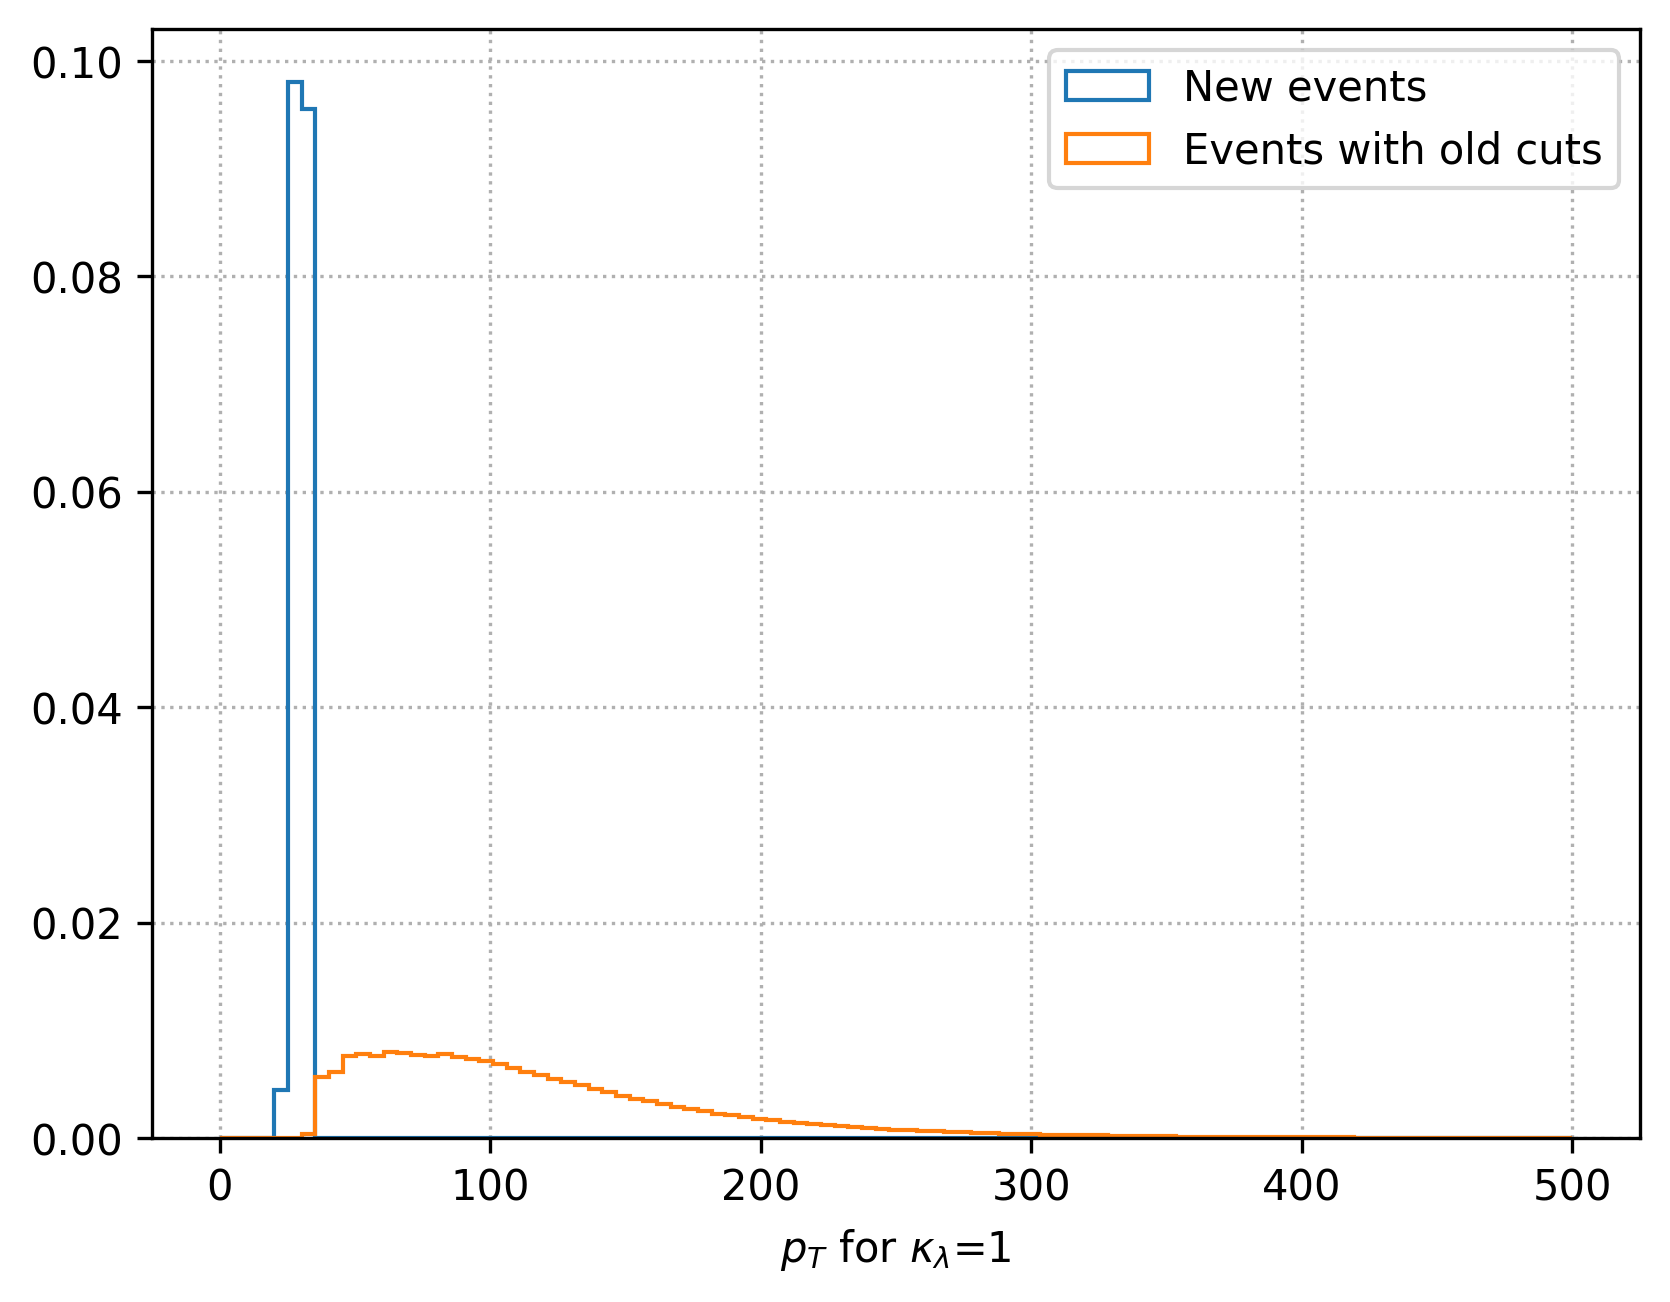

[25.4, 31.2, 25.6, 27.2, 28.3, 29, 26.8, ... 33.8, 26.9, 25.4, 25.6, 29.1, 31.9]
[[167, 37.4, 152, 63.2], [37.4, 110, 87.7, ... 161, 54, 141], [56.6, 139, 53.4, 109]]
[25.4, 31.2, 25.6, 27.2, 28.3, 29, 26.8, ... 33.8, 26.9, 25.4, 25.6, 29.1, 31.9]


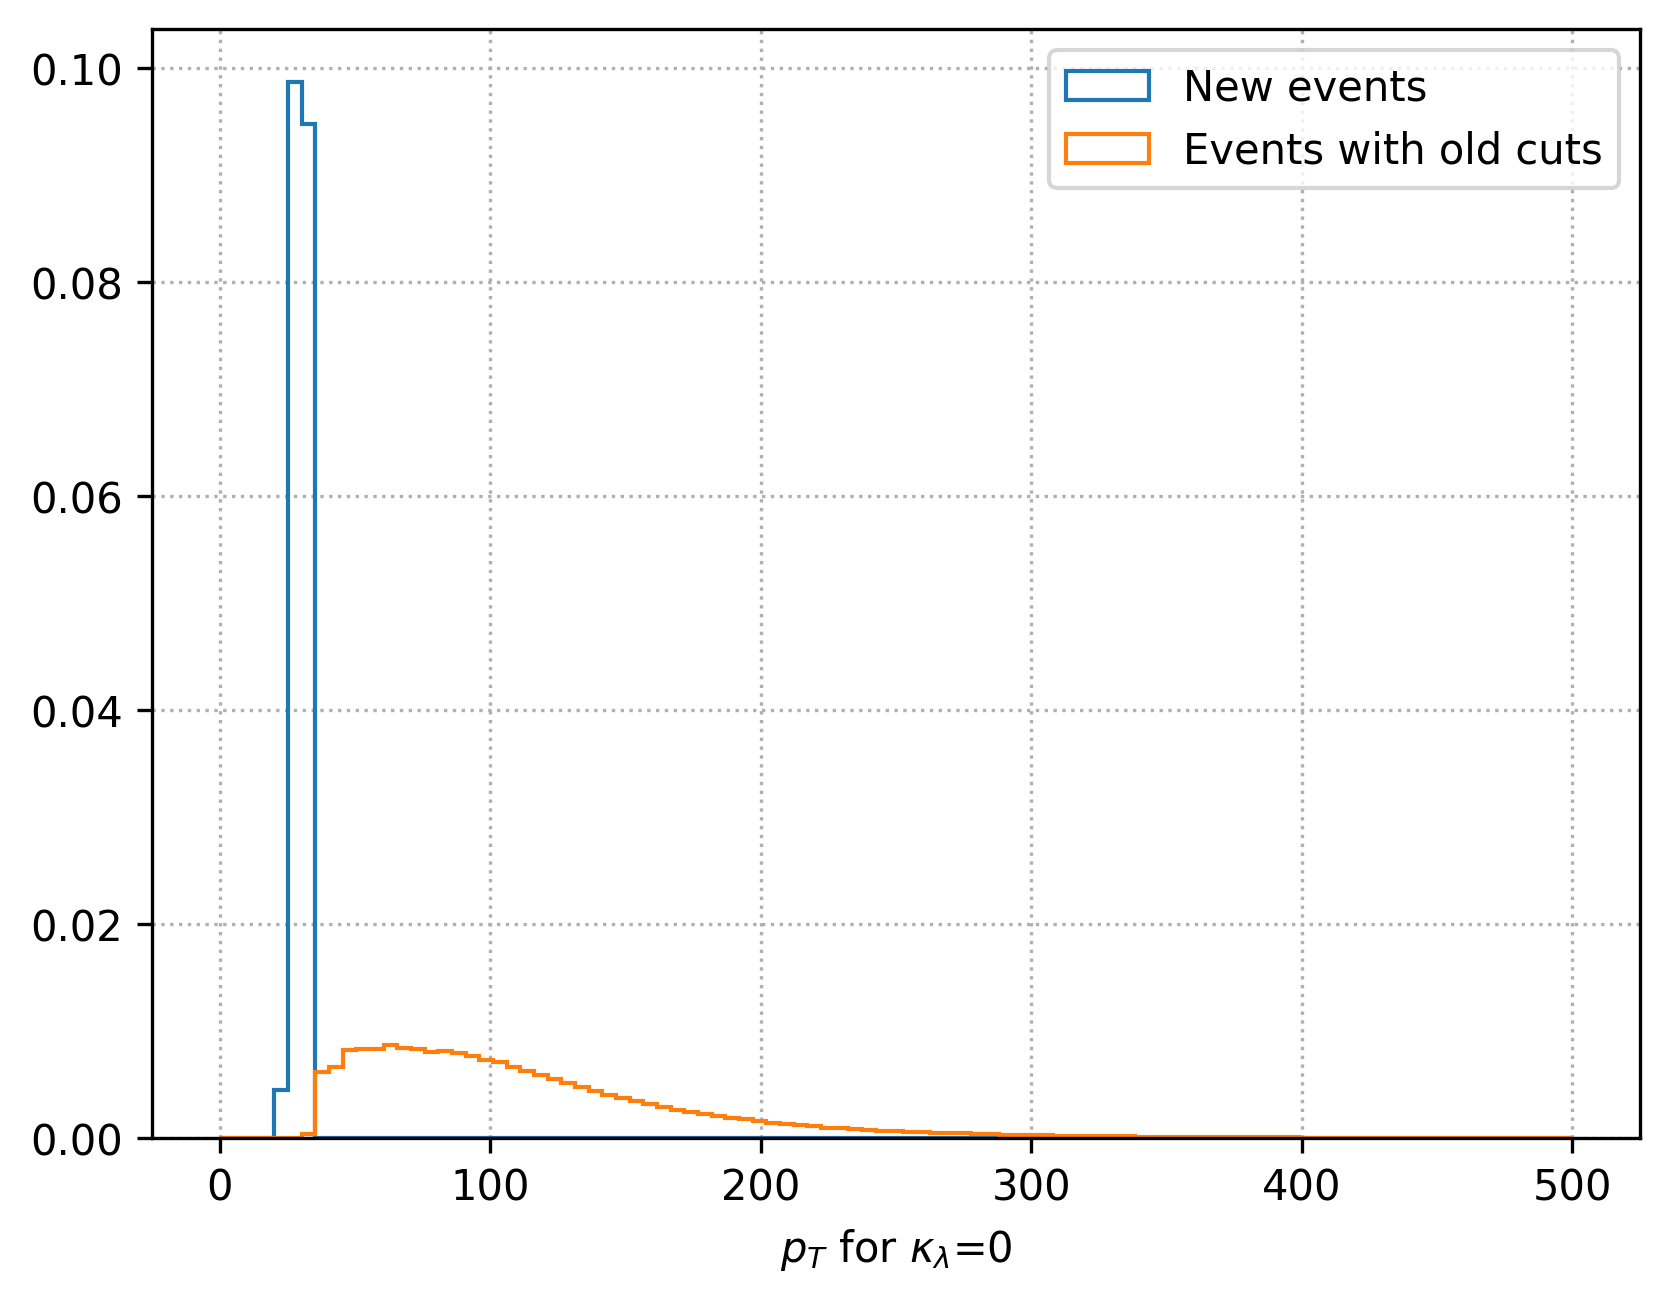

[0.407, 0.99, 0.826, 0.47, 0.956, 0.966, ... 0.868, 0.987, 0.944, 0.918, 0.541]
[[0.999, 0.999, 0.968, 0.928], [0.999, ... 0.751], [0.998, 0.986, 0.832, 0.304]]
[0.407, 0.99, 0.826, 0.47, 0.956, 0.966, ... 0.868, 0.987, 0.944, 0.918, 0.541]


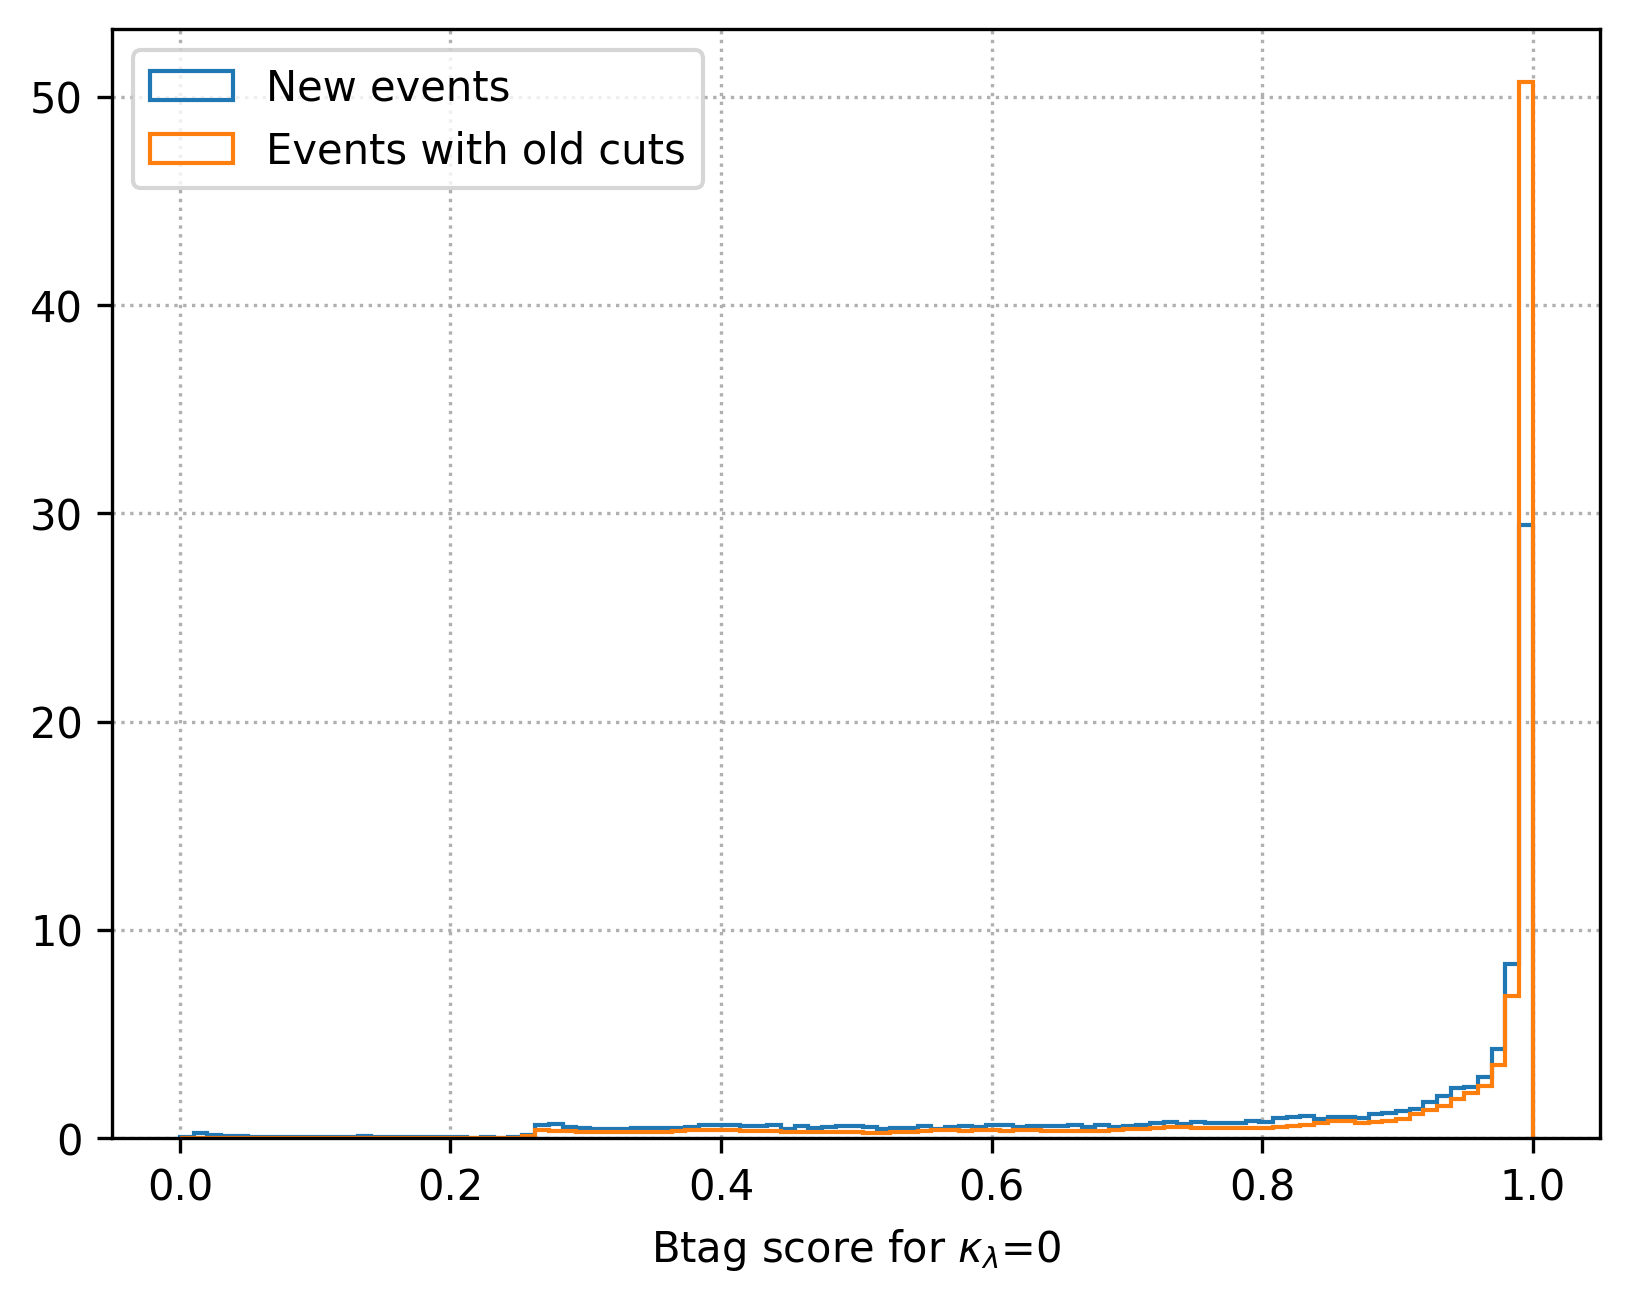

[34.2, 33.2, 30.8, 28.1, 32.5, 31.9, 35, ... 29.2, 32.7, 33.7, 32, 28.6, 31.3, 32.5]
[[67.9, 84.3, 86.1, 63.2], [117, 64.8, 42.3, ... 70.6, 102], [135, 105, 71.4, 36.4]]
[34.2, 33.2, 30.8, 28.1, 32.5, 31.9, 35, ... 29.2, 32.7, 33.7, 32, 28.6, 31.3, 32.5]


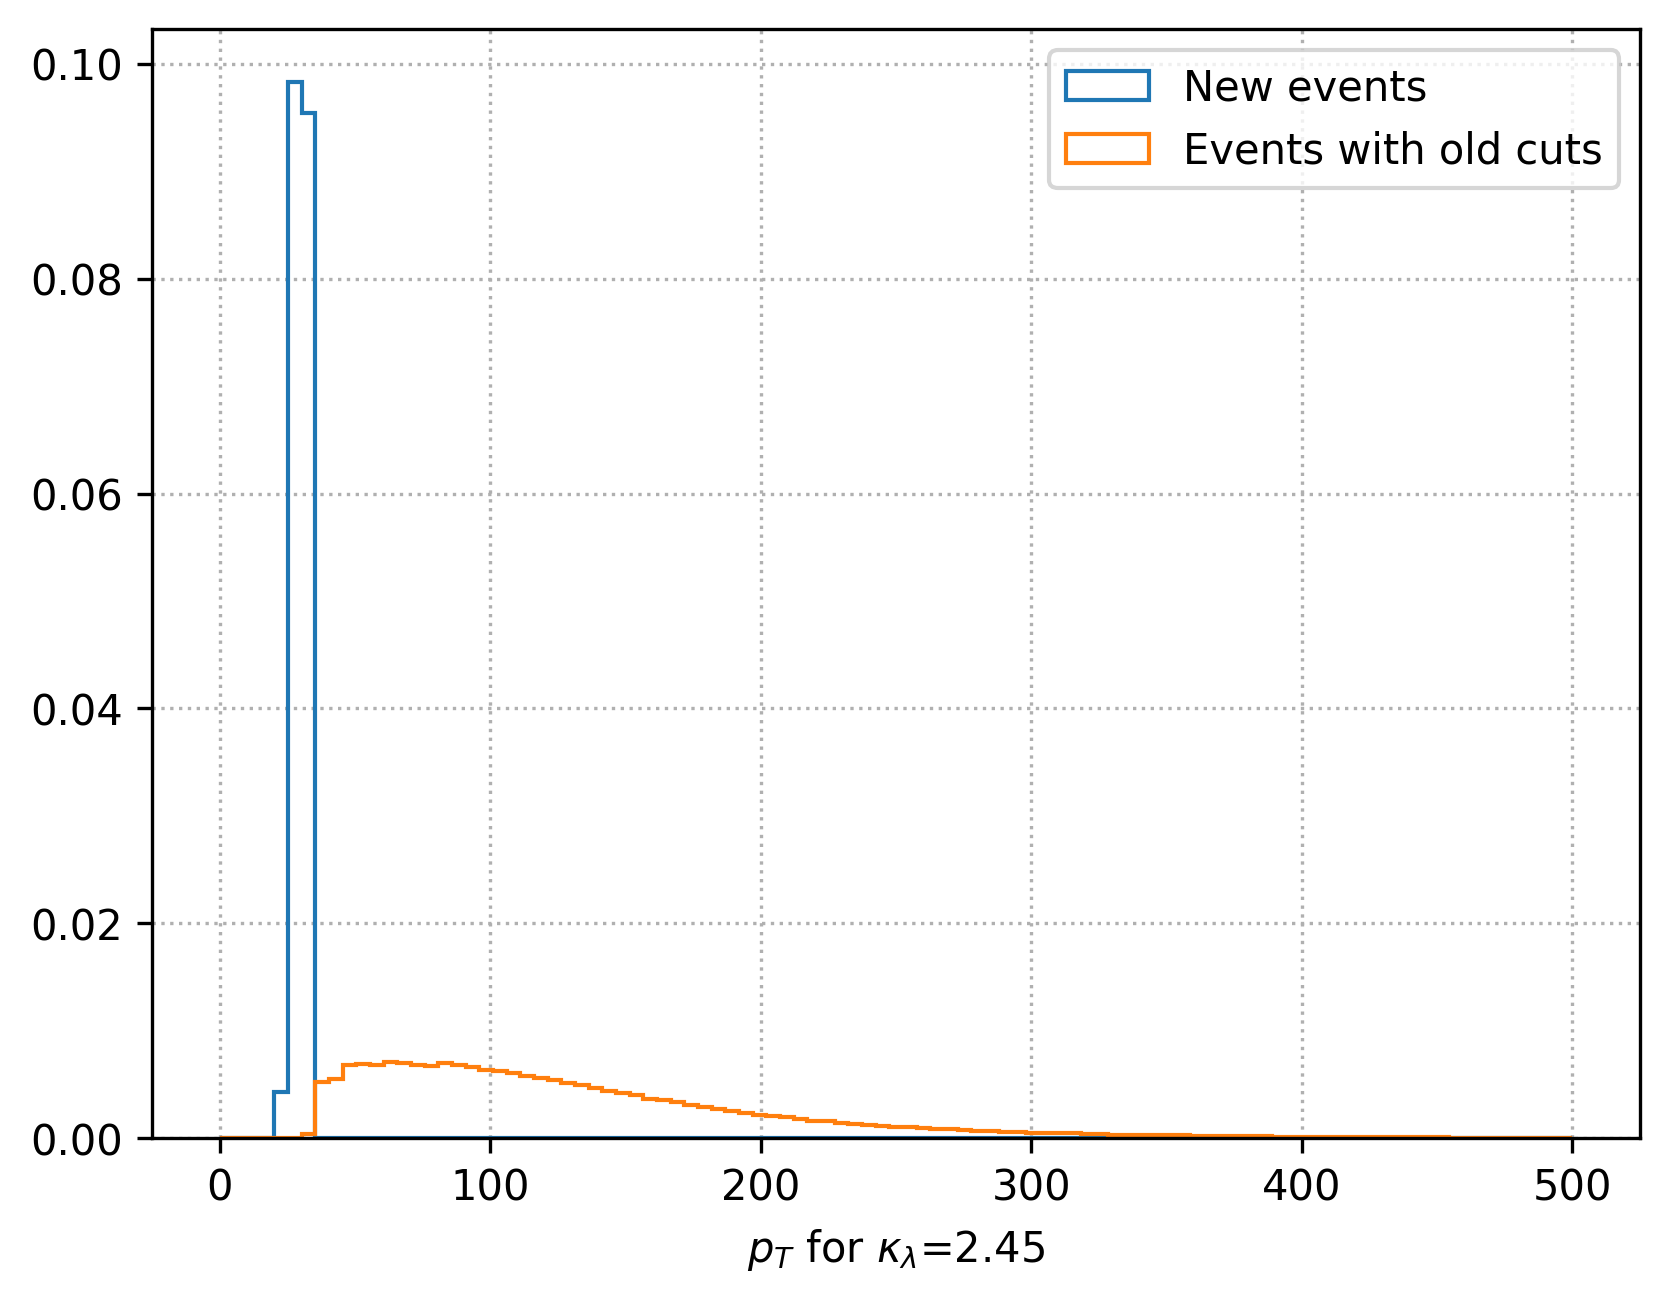

[0.995, 0.778, 0.997, 0.993, 0.993, 1, ... 0.49, 0.996, 0.999, 0.601, 0.991, 0.997]
[[0.996, 0.99, 0.897, 0.662], [1, 1, ... 0.903, 0.517], [1, 0.999, 0.899, 0.806]]
[0.995, 0.778, 0.997, 0.993, 0.993, 1, ... 0.49, 0.996, 0.999, 0.601, 0.991, 0.997]


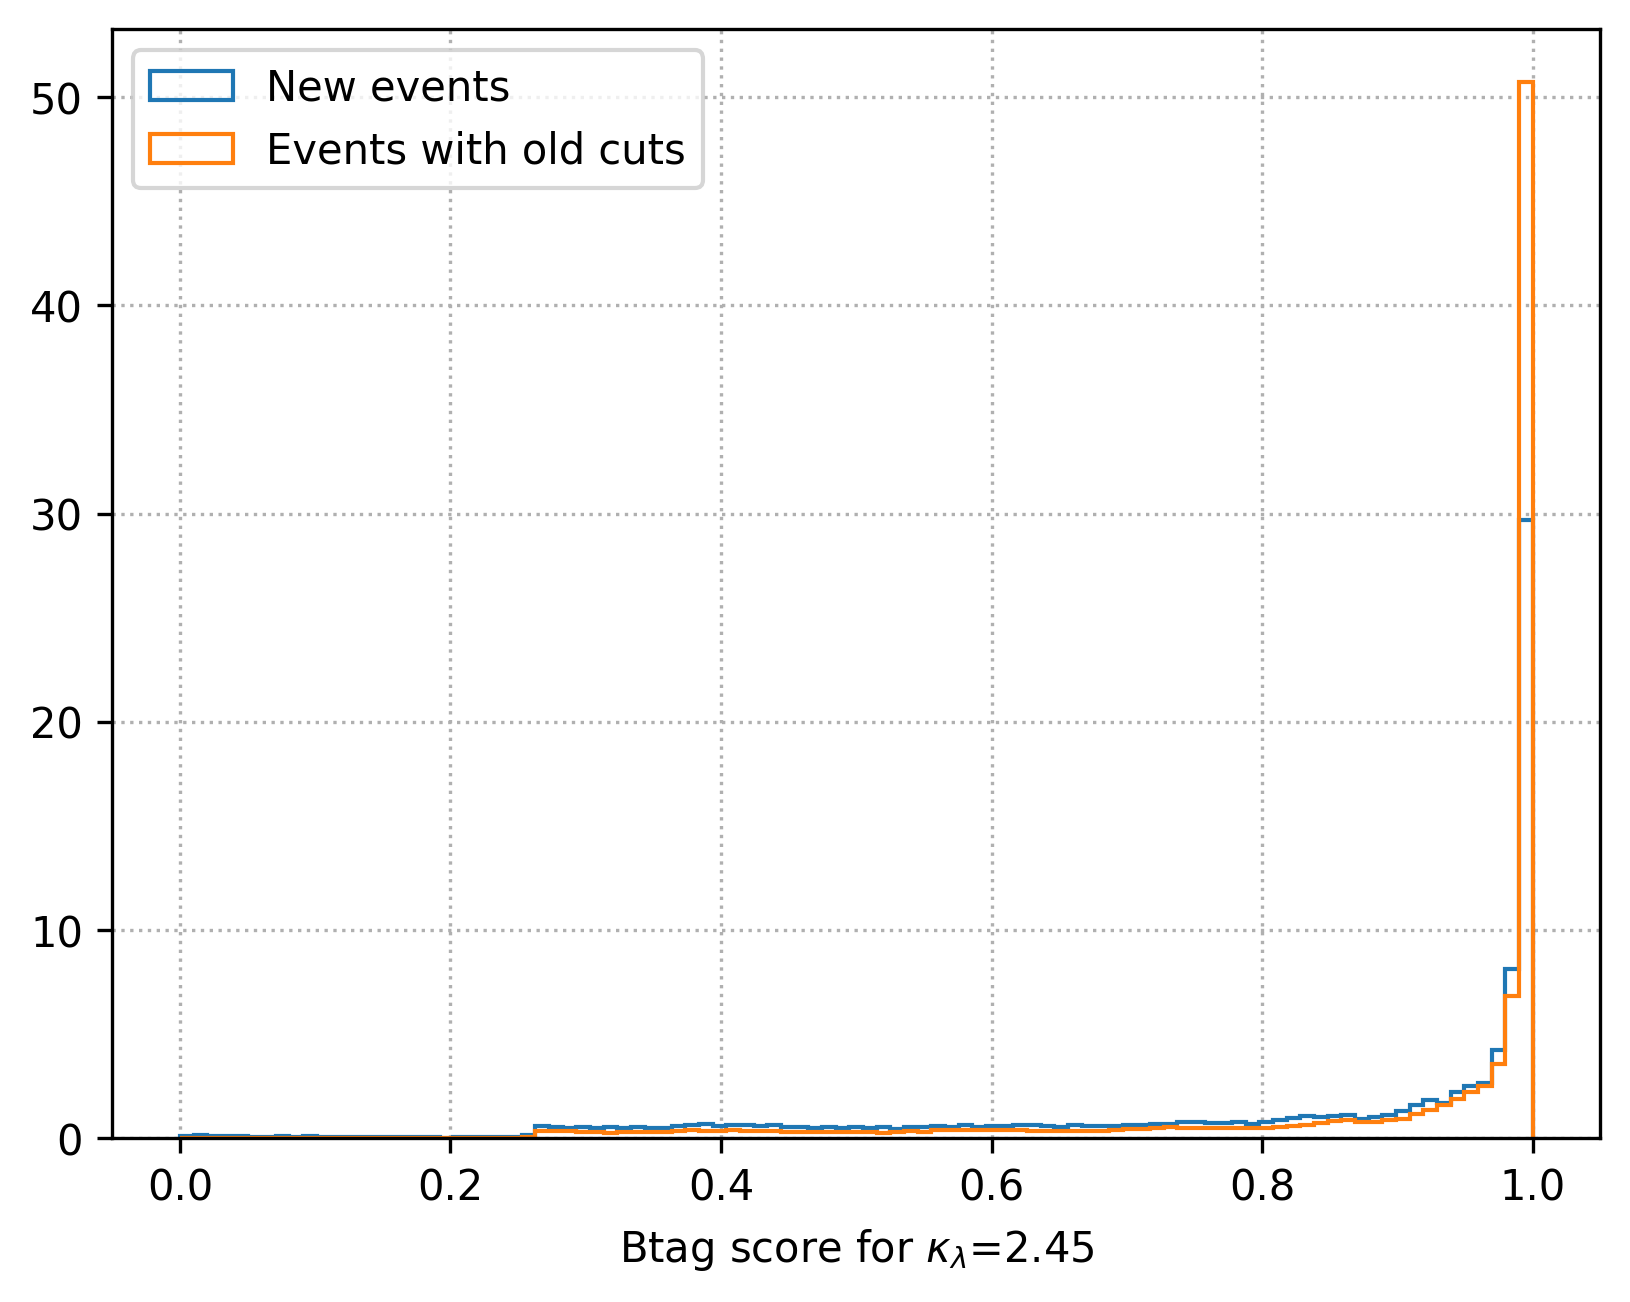

[25.4, 31.2, 25.6, 27.2, 28.3, 29, 26.8, ... 33.8, 26.9, 25.4, 25.6, 29.1, 31.9]
[[51.6, 123, 128, 42.5], [104, 65.7, 91.6, ... 129, 68.3], [112, 109, 88.9, 56.1]]
[25.4, 31.2, 25.6, 27.2, 28.3, 29, 26.8, ... 33.8, 26.9, 25.4, 25.6, 29.1, 31.9]


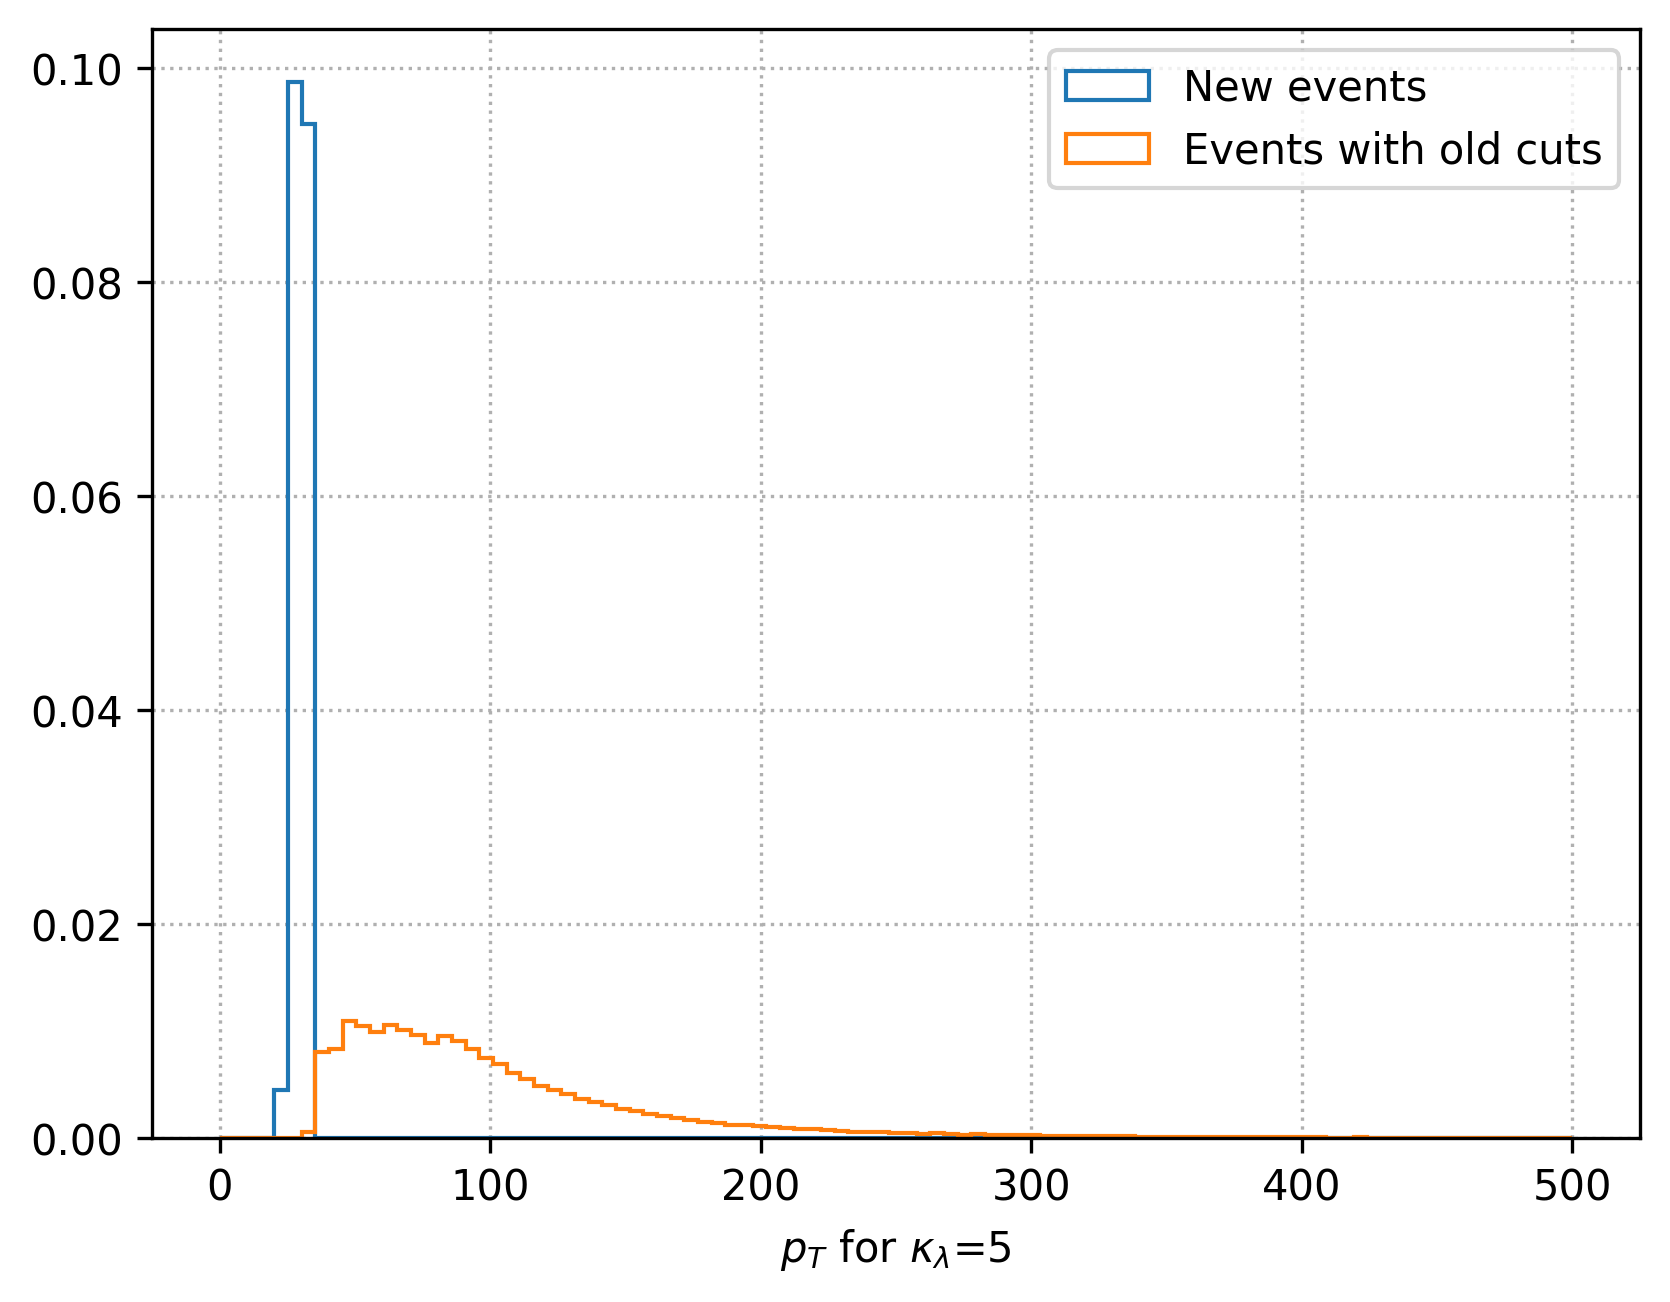

[0.407, 0.99, 0.826, 0.47, 0.956, 0.966, ... 0.868, 0.987, 0.944, 0.918, 0.541]
[[1, 0.955, 0.885, 0.669], [1, 0.994, ... 0.849, 0.781], [1, 0.999, 0.997, 0.996]]
[0.407, 0.99, 0.826, 0.47, 0.956, 0.966, ... 0.868, 0.987, 0.944, 0.918, 0.541]


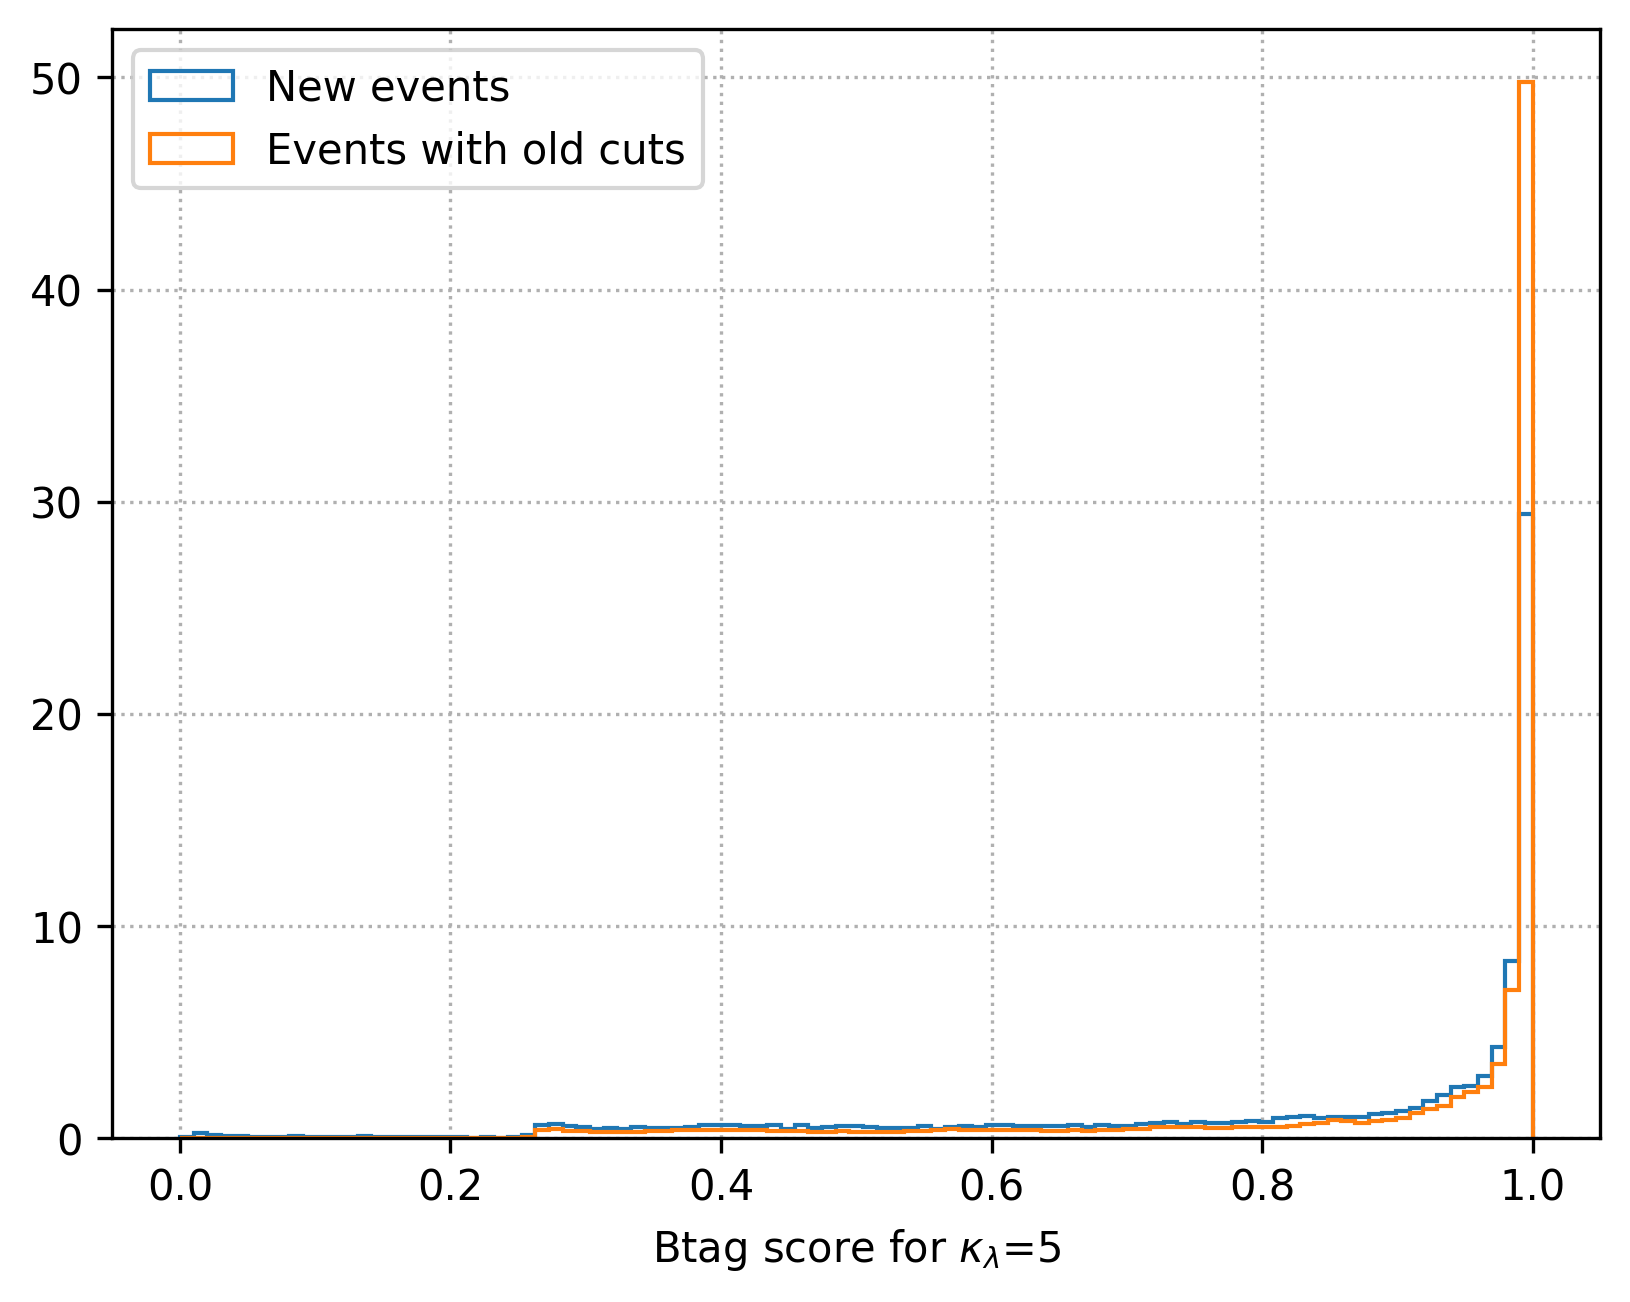

In [ ]:
plot_kinvar_flat(jet_kl1_nc_mask_flat,jet_kl1_oc,"btag","1",np.linspace(0,1,100))
plot_kinvar_flat(jet_kl1_nc_mask_flat,jet_kl1_oc,"pt","1",np.linspace(0,500,100))
plot_kinvar_flat(jet_kl0_nc_mask_flat,jet_kl0_oc,"pt","0",np.linspace(0,500,100))
plot_kinvar_flat(jet_kl0_nc_mask_flat,jet_kl0_oc,"btag","0",np.linspace(0,1,100))
plot_kinvar_flat(jet_kl2p45_nc_mask_flat,jet_kl2p45_oc,"pt","2.45",np.linspace(0,500,100))
plot_kinvar_flat(jet_kl2p45_nc_mask_flat,jet_kl2p45_oc,"btag","2.45",np.linspace(0,1,100))
plot_kinvar_flat(jet_kl5_nc_mask_flat,jet_kl5_oc,"pt","5",np.linspace(0,500,100))
plot_kinvar_flat(jet_kl5_nc_mask_flat,jet_kl5_oc,"btag","5",np.linspace(0,1,100))